 <img src="hw4.PNG">

In [117]:
import numpy
import urllib
import scipy.optimize
import random
from collections import defaultdict # Dictionaries with default values
import nltk
import string
from nltk.stem.porter import *
from sklearn import linear_model
import ast
import pandas as pd

<img src="problem1.PNG">

In [118]:
def parseDataFromFile(fname):
  for l in open(fname):
    yield ast.literal_eval(l)   
    
data = list(parseDataFromFile("beer_50000.json"))
print(len(data))

50000


In [119]:
data[0]

{'review/appearance': 2.5,
 'beer/style': 'Hefeweizen',
 'review/palate': 1.5,
 'review/taste': 1.5,
 'beer/name': 'Sausa Weizen',
 'review/timeUnix': 1234817823,
 'beer/ABV': 5.0,
 'beer/beerId': '47986',
 'beer/brewerId': '10325',
 'review/timeStruct': {'isdst': 0,
  'mday': 16,
  'hour': 20,
  'min': 57,
  'sec': 3,
  'mon': 2,
  'year': 2009,
  'yday': 47,
  'wday': 0},
 'review/overall': 1.5,
 'review/text': 'A lot of foam. But a lot.\tIn the smell some banana, and then lactic and tart. Not a good start.\tQuite dark orange in color, with a lively carbonation (now visible, under the foam).\tAgain tending to lactic sourness.\tSame for the taste. With some yeast and banana.',
 'user/profileName': 'stcules',
 'review/aroma': 2.0}

In [190]:
import numpy as np
print(np.max([d['review/appearance'] for d in data]))
print(np.max([d['review/palate'] for d in data]))
print(np.max([d['review/taste'] for d in data]))
print(np.min([d['beer/ABV'] for d in data]))
print(np.max([d['beer/ABV'] for d in data]))
print(np.max([d['review/overall'] for d in data]))



5.0
5.0
5.0
0.1
57.7
5.0


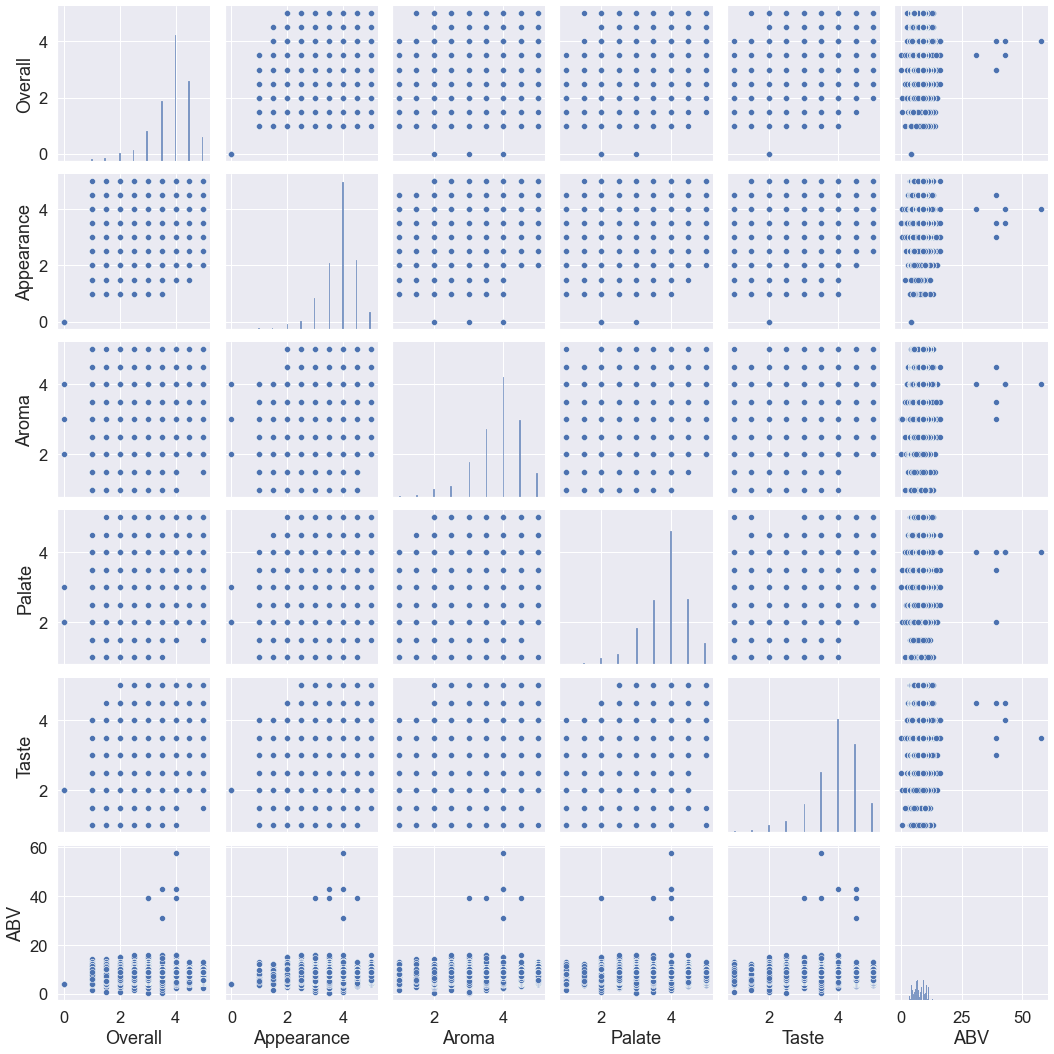

In [194]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Basic correlogram
def score(datum):
    feat = [0]*6
    feat[0] = datum['review/overall']
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    feat[5] = datum['beer/ABV']
    return feat

sense_df = pd.DataFrame(np.array([score(d) for d in data]), 
           columns=['Overall','Appearance','Aroma','Palate','Taste','ABV'])

sns.set(font_scale=1.5)
sns.pairplot(sense_df)

In [121]:
train = data[:40000]
test = data[40000:]

In [122]:
y_train = [d['review/overall'] for d in train]
y_test = [d['review/overall'] for d in test]

# Mean of appearance, aroma, palate, taste

In [301]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

### predict mean
pred_train = [(d['review/appearance']+d['review/aroma']+d['review/palate']+d['review/taste'])/4 for d in train]
pred_test = [(d['review/appearance']+d['review/aroma']+d['review/palate']+d['review/taste'])/4 for d in test]

print("MSEtrain = ",MSE(y_train, pred_train))
print("MSEtest = ",MSE(y_test, pred_test))

MSEtrain =  0.189058203125
MSEtest =  0.2285546875


# Linear model with bias 

In [126]:
def feature(datum):
    feat = [1]*5
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

X_train = [feature(d) for d in train]
X_test = [feature(d) for d in test]

In [127]:
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
clf.fit(X_train, y_train)
theta = clf.coef_
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print(theta[:20])
print("MSEtrain = ",MSE(y_train, pred_train))
print("MSEtest = ",MSE(y_test, pred_test))

weights = list(zip(theta, ['bias','appearance','aroma','palate','taste']))
weights.sort()
weights.reverse()
print(weights)

[0.3642557  0.06235565 0.07381347 0.2357208  0.52979958]
MSEtrain =  0.16611975737081341
MSEtest =  0.19418968436273393
[(0.5297995783373584, 'taste'), (0.36425570252679024, 'bias'), (0.23572080331818665, 'palate'), (0.07381346617926379, 'aroma'), (0.0623556467323514, 'appearance')]


 # Correlogram

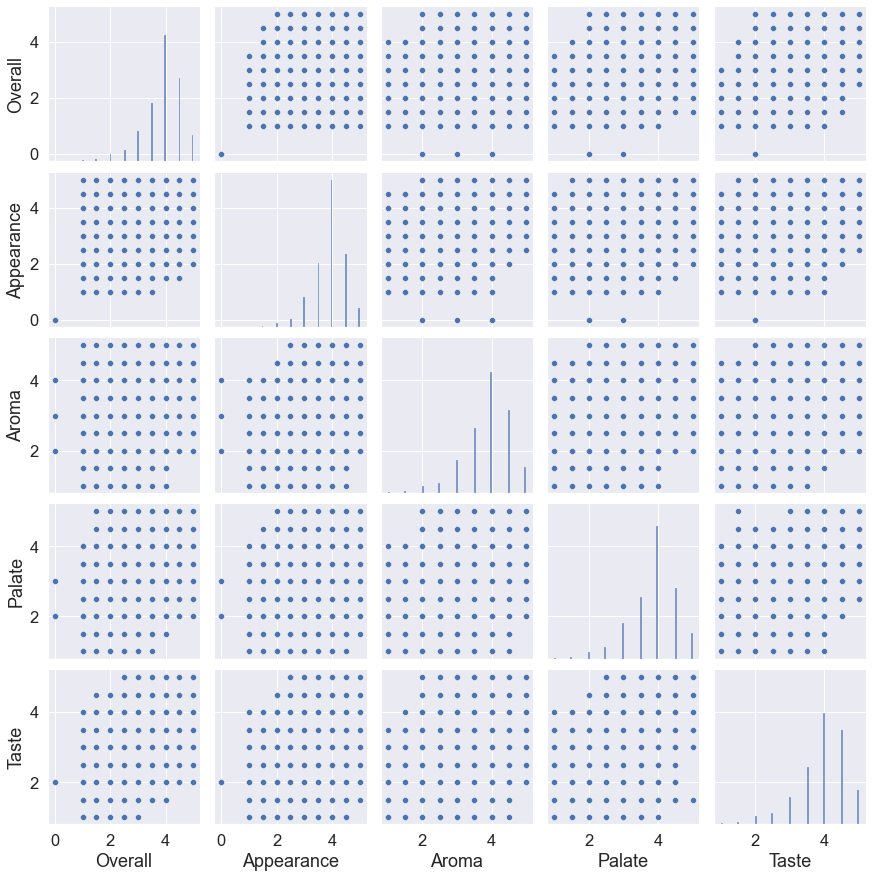

In [128]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Basic correlogram
def score(datum):
    feat = [0]*5
    feat[0] = datum['review/overall']
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

sense_df = pd.DataFrame(np.array([score(d) for d in train]), 
           columns=['Overall','Appearance','Aroma','Palate','Taste'])

sns.set(font_scale=1.5)
sns.pairplot(sense_df)

In [138]:
import pickle
import numpy

OverallMean = 0

BeerStyles = defaultdict(int)
BeerStylesOverall = defaultdict(list)

BrewerId = defaultdict(int)
BrewerIdOverall = defaultdict(list)  

BeerStylesAppearance = defaultdict(list) 
BeerStylesAroma = defaultdict(list)     
BeerStylesPalate = defaultdict(list) 
BeerStylesTaste = defaultdict(list) 


for d in train:
    OverallMean+=d['review/overall']
    if d['beer/style'] not in BeerStyles: BeerStyles[d['beer/style']]=1
    else : BeerStyles[d['beer/style']]+=1
    BrewerIdOverall[d['beer/brewerId']].append(d['review/overall'])
    
    if d['beer/brewerId'] not in BrewerId: BrewerId[d['beer/brewerId']]=1
    else : BrewerId[d['beer/brewerId']]+=1
    BeerStylesOverall[d['beer/style']].append(d['review/overall'])
    
    BeerStylesAppearance[d['beer/style']].append(d['review/appearance'])
    BeerStylesAroma[d['beer/style']].append(d['review/aroma'])
    BeerStylesPalate[d['beer/style']].append(d['review/palate'])
    BeerStylesTaste[d['beer/style']].append(d['review/taste'])
    
OverallMean = OverallMean/len(train)

np.save('OverallMean.npy', OverallMean)

file = open("BeerStyles.pkl","wb")
pickle.dump(BeerStyles,file)
file.close()

file = open("BeerStylesOverall.pkl","wb")
pickle.dump(BeerStylesOverall,file)
file.close()

file = open("BrewerId.pkl","wb")
pickle.dump(BrewerId,file)
file.close()

file = open("BrewerIdOverall.pkl","wb")
pickle.dump(BrewerIdOverall,file)
file.close()

file = open("BeerStylesAppearance.pkl","wb")
pickle.dump(BeerStylesAppearance,file)
file.close()
  
file = open("BeerStylesAroma.pkl","wb")
pickle.dump(BeerStylesAroma,file)
file.close()

file = open("BeerStylesPalate.pkl","wb")
pickle.dump(BeerStylesPalate,file)
file.close()

file = open("BeerStylesTaste.pkl","wb")
pickle.dump(BeerStylesTaste,file)
file.close()


In [139]:
print(BrewerId)
# plot number of brewer id

defaultdict(<class 'int'>, {'10325': 4, '1075': 886, '8802': 9, '2724': 37, '7345': 5, '163': 568, '3407': 8, '11715': 8, '18185': 3, '1463': 58, '1454': 129, '850': 195, '577': 140, '14756': 90, '24162': 3, '21841': 84, '13614': 8, '26612': 7, '25484': 3, '13956': 1, '26983': 1, '17293': 5, '26990': 19, '24517': 2, '21138': 5, '16859': 43, '23246': 56, '7314': 1, '18847': 6, '23082': 3, '2188': 41, '15527': 13, '20658': 42, '10103': 2, '15607': 1, '15636': 28, '1746': 1, '3631': 2, '2055': 75, '16994': 17, '971': 18, '25953': 1, '10774': 13, '14879': 3122, '20988': 4, '2310': 55, '1303': 97, '25684': 5, '936': 69, '2446': 164, '1487': 7, '5007': 2, '12907': 5, '21516': 273, '3282': 339, '3207': 1, '12003': 34, '6277': 12, '1917': 19, '22288': 1, '16791': 44, '16863': 4, '22167': 68, '23739': 5, '1386': 178, '2430': 50, '24072': 3, '1482': 29, '5752': 5, '765': 431, '26946': 8, '10950': 1, '395': 1632, '3965': 25, '26816': 7, '23020': 27, '2647': 27, '13670': 25, '21590': 1, '5049': 73

170
0.5067521920595515


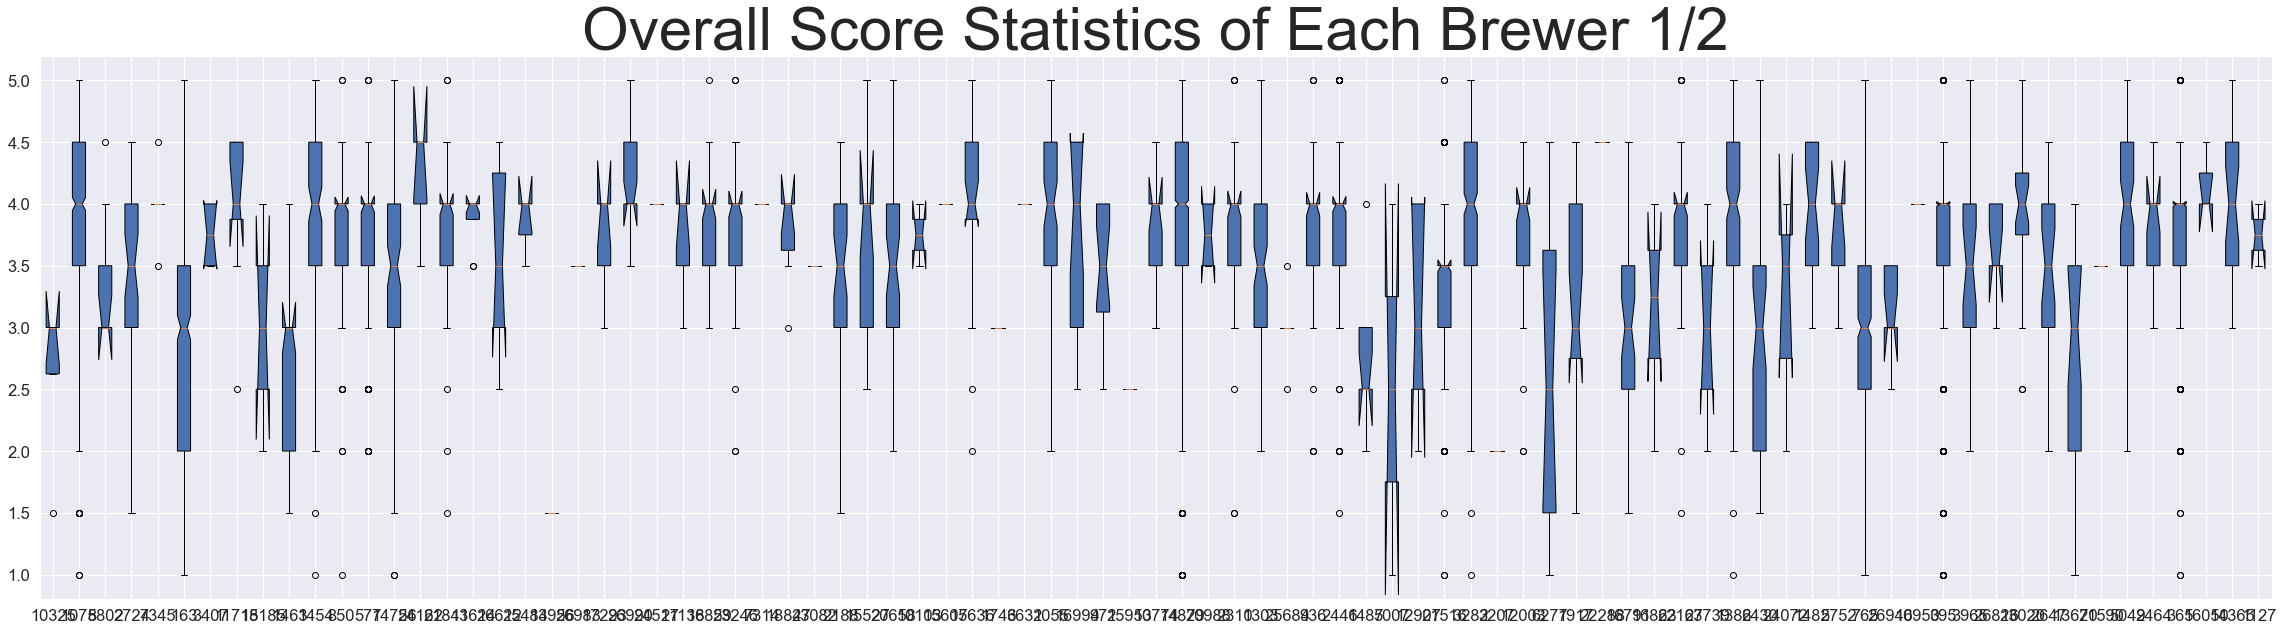

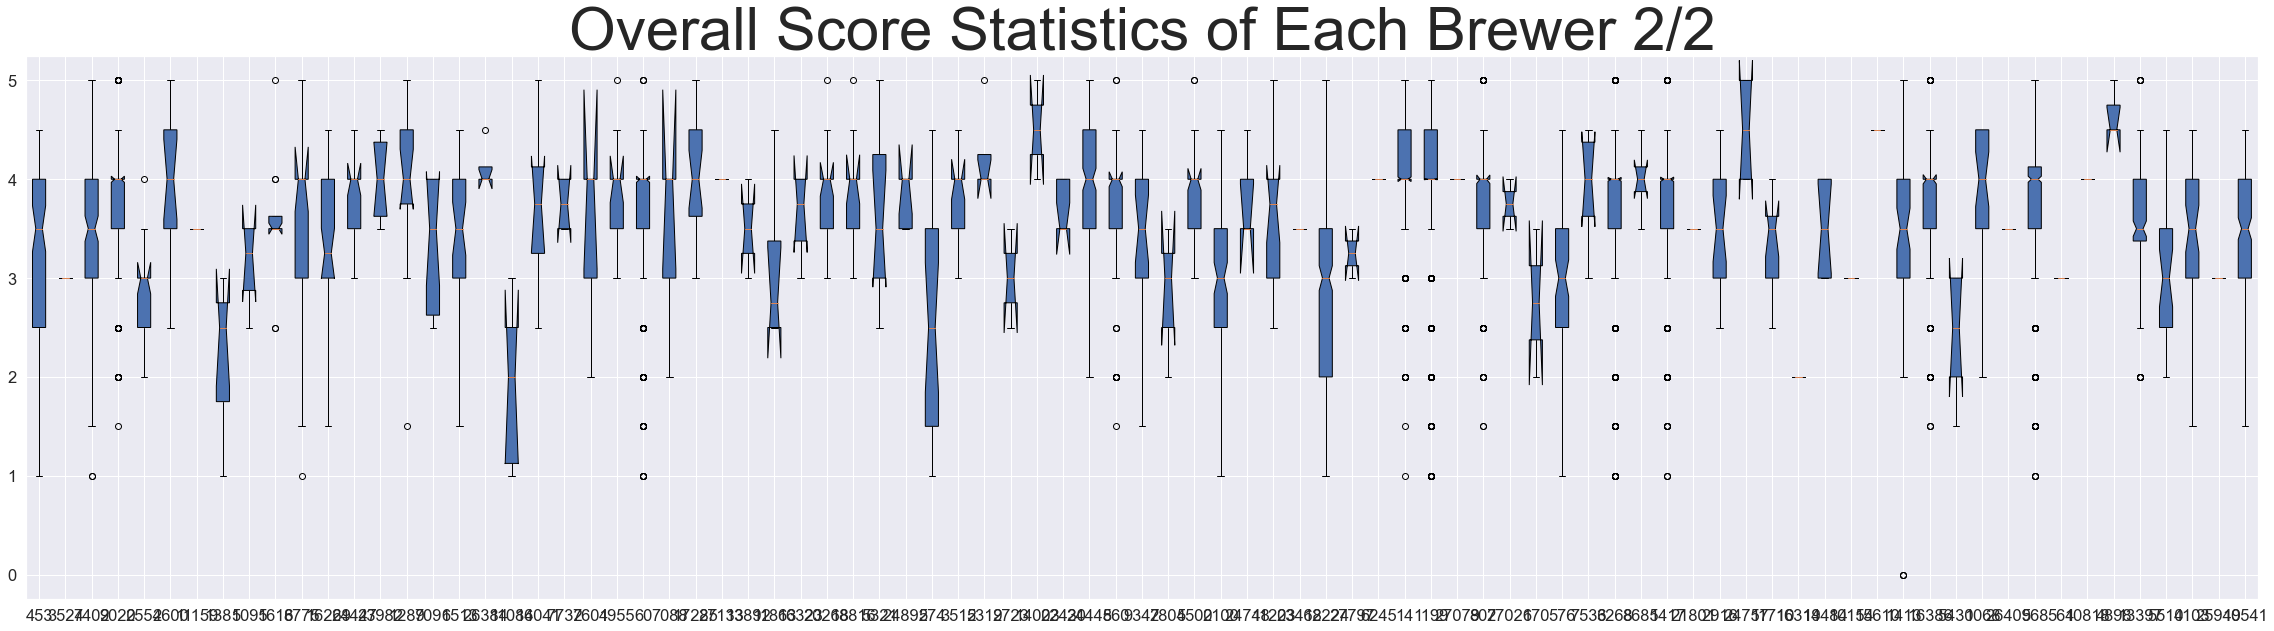

In [189]:
print(len(list(BrewerIdOverall.keys())))
# overall rating
all_data = [BrewerIdOverall[k] for k in list(BrewerIdOverall.keys())[:85]]
labels = list(BrewerIdOverall.keys())[:85]
fig, ax = plt.subplots(figsize = (40,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Overall Score Statistics of Each Brewer 1/2', fontsize=60) 

all_data = [BrewerIdOverall[k] for k in list(BrewerIdOverall.keys())[85:]]
labels = list(BrewerIdOverall.keys())[85:]
fig, ax = plt.subplots(figsize = (40,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Overall Score Statistics of Each Brewer 2/2', fontsize=60) 

print(np.mean([np.std(BrewerIdOverall[k]) for k in BrewerIdOverall.keys()]))

0.6554059474004148


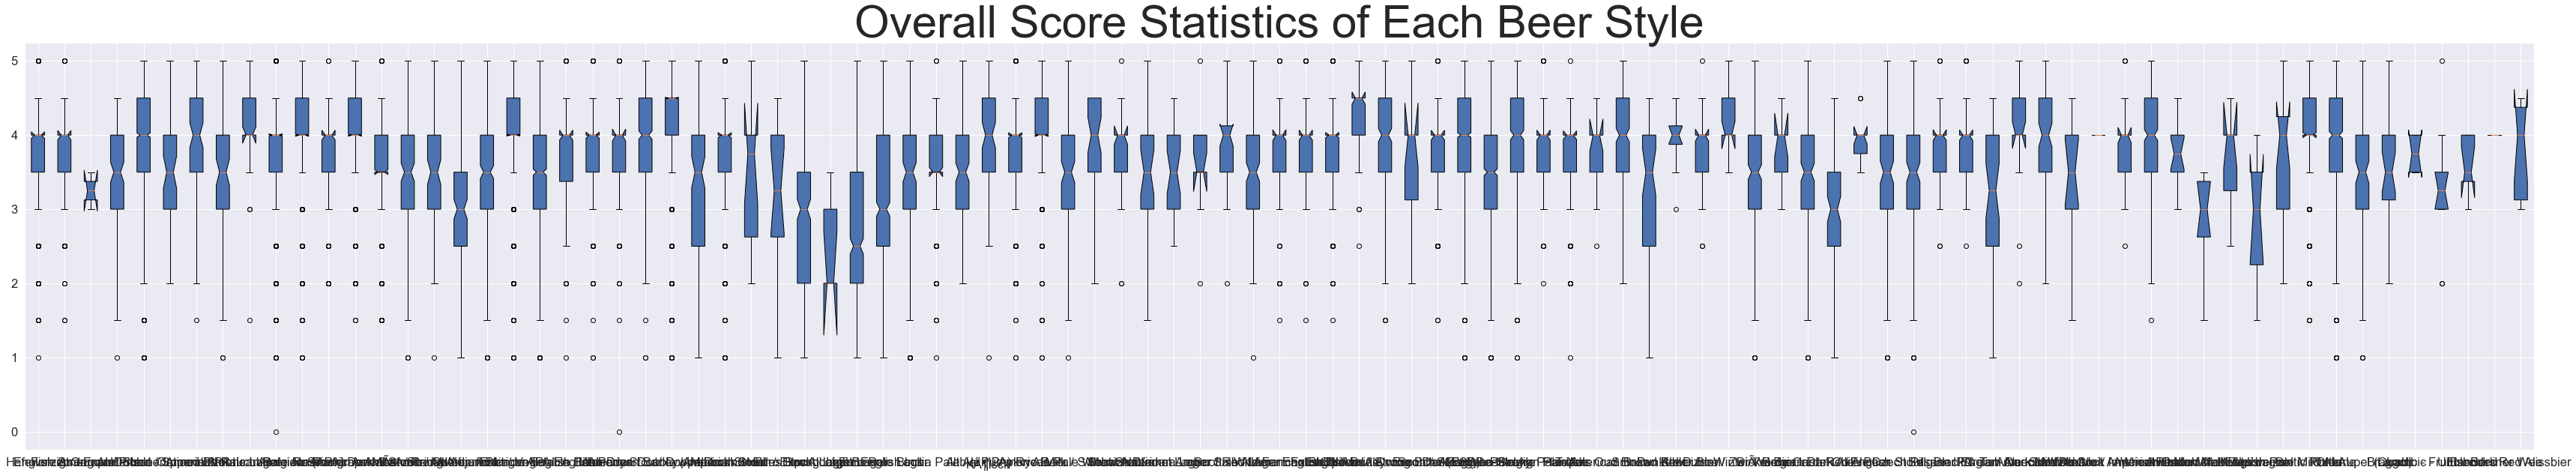

In [184]:
# overall rating
all_data = [BeerStylesOverall[k] for k in BeerStyles.keys()]
labels = BeerStyles.keys()
fig, ax = plt.subplots(figsize = (60,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Overall Score Statistics of Each Beer Style', fontsize=60) 

print(np.mean([np.std(BeerStylesOverall[k]) for k in BeerStyles.keys()]))

0.5173870402595988


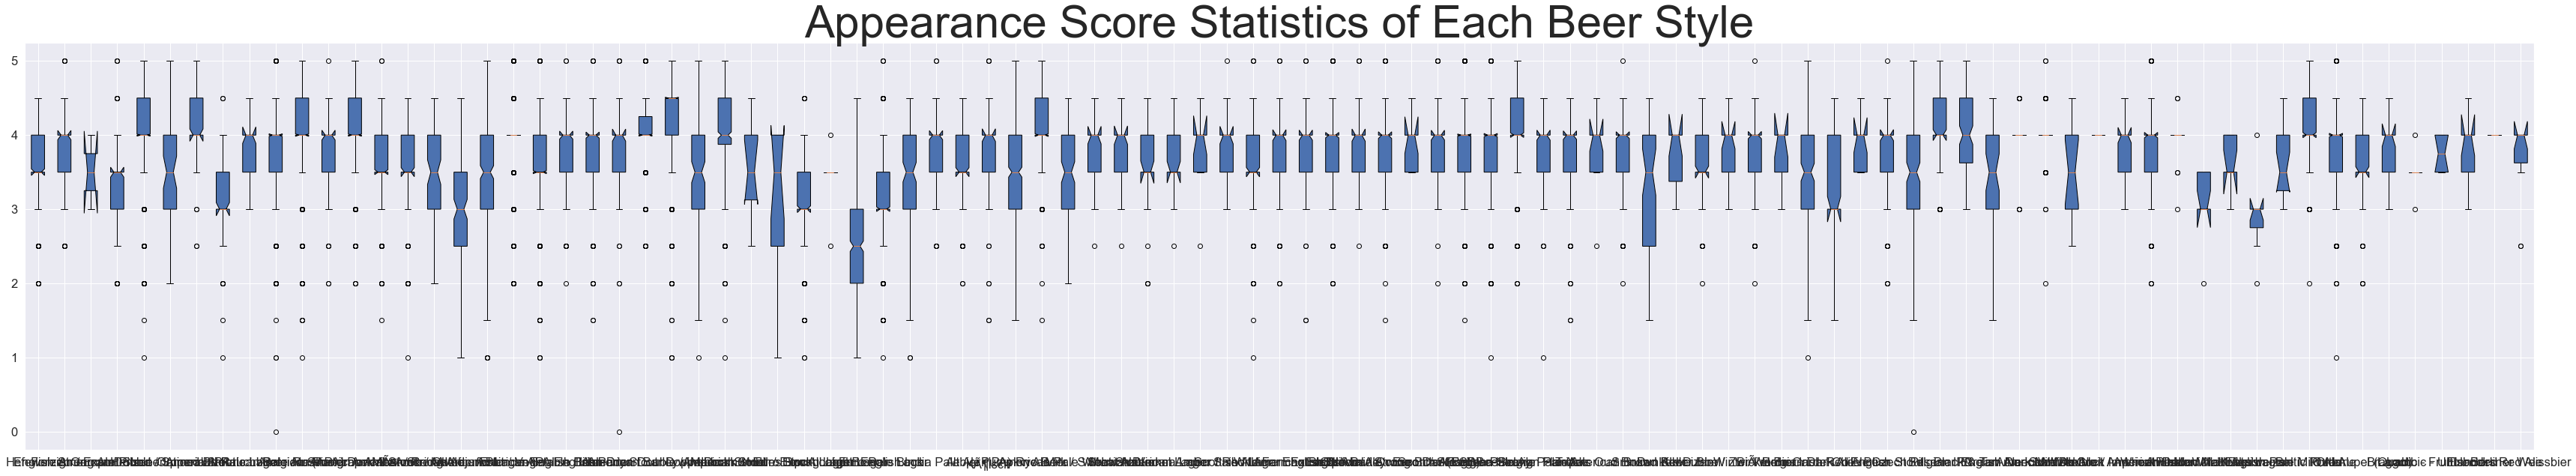

In [185]:
# appearance rating
all_data = [BeerStylesAppearance[k] for k in BeerStyles.keys()]
labels = BeerStyles.keys()
fig, ax = plt.subplots(figsize = (60,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Appearance Score Statistics of Each Beer Style', fontsize=60) 

print(np.mean([np.std(BeerStylesAppearance[k]) for k in BeerStyles.keys()]))

0.5697842305997054


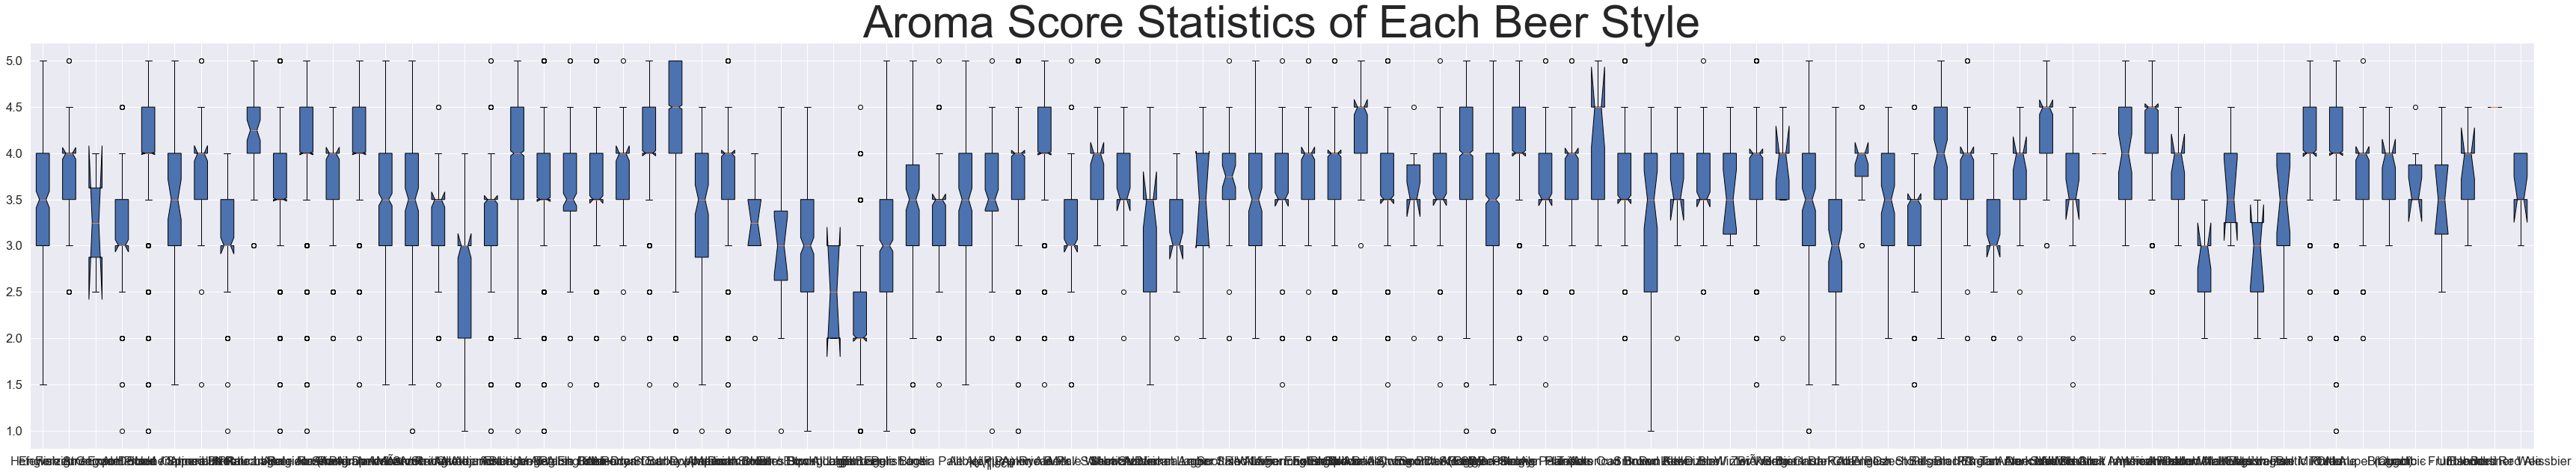

In [186]:
# aroma rating
all_data = [BeerStylesAroma[k] for k in BeerStyles.keys()]
labels = BeerStyles.keys()
fig, ax = plt.subplots(figsize = (60,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Aroma Score Statistics of Each Beer Style', fontsize=60) 
print(np.mean([np.std(BeerStylesAroma[k]) for k in BeerStyles.keys()]))

0.6087179830671811


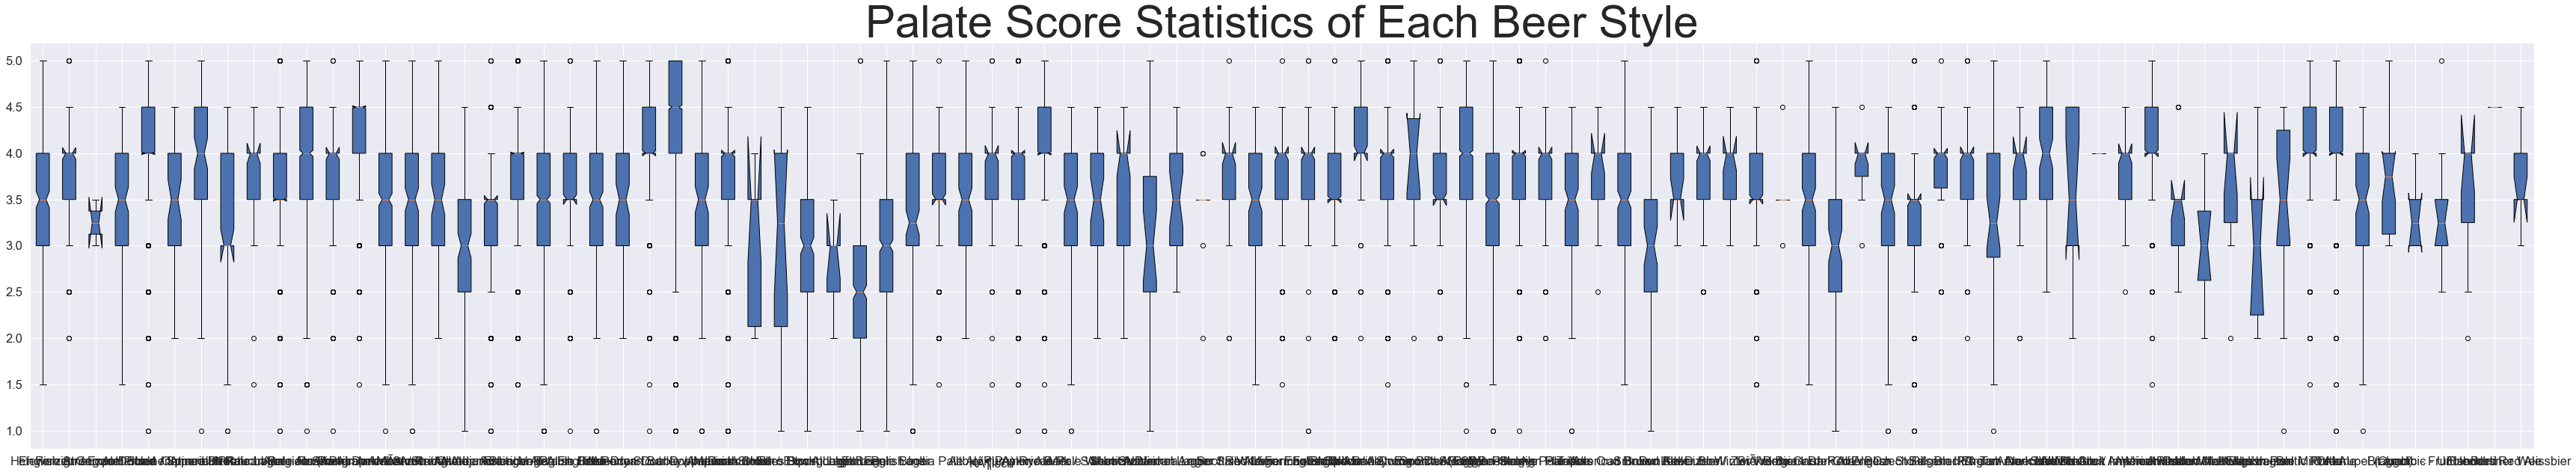

In [187]:
# palate rating
all_data = [BeerStylesPalate[k] for k in BeerStyles.keys()]
labels = BeerStyles.keys()
fig, ax = plt.subplots(figsize = (60,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Palate Score Statistics of Each Beer Style', fontsize=60) 
print(np.mean([np.std(BeerStylesPalate[k]) for k in BeerStyles.keys()]))

0.623328107359201


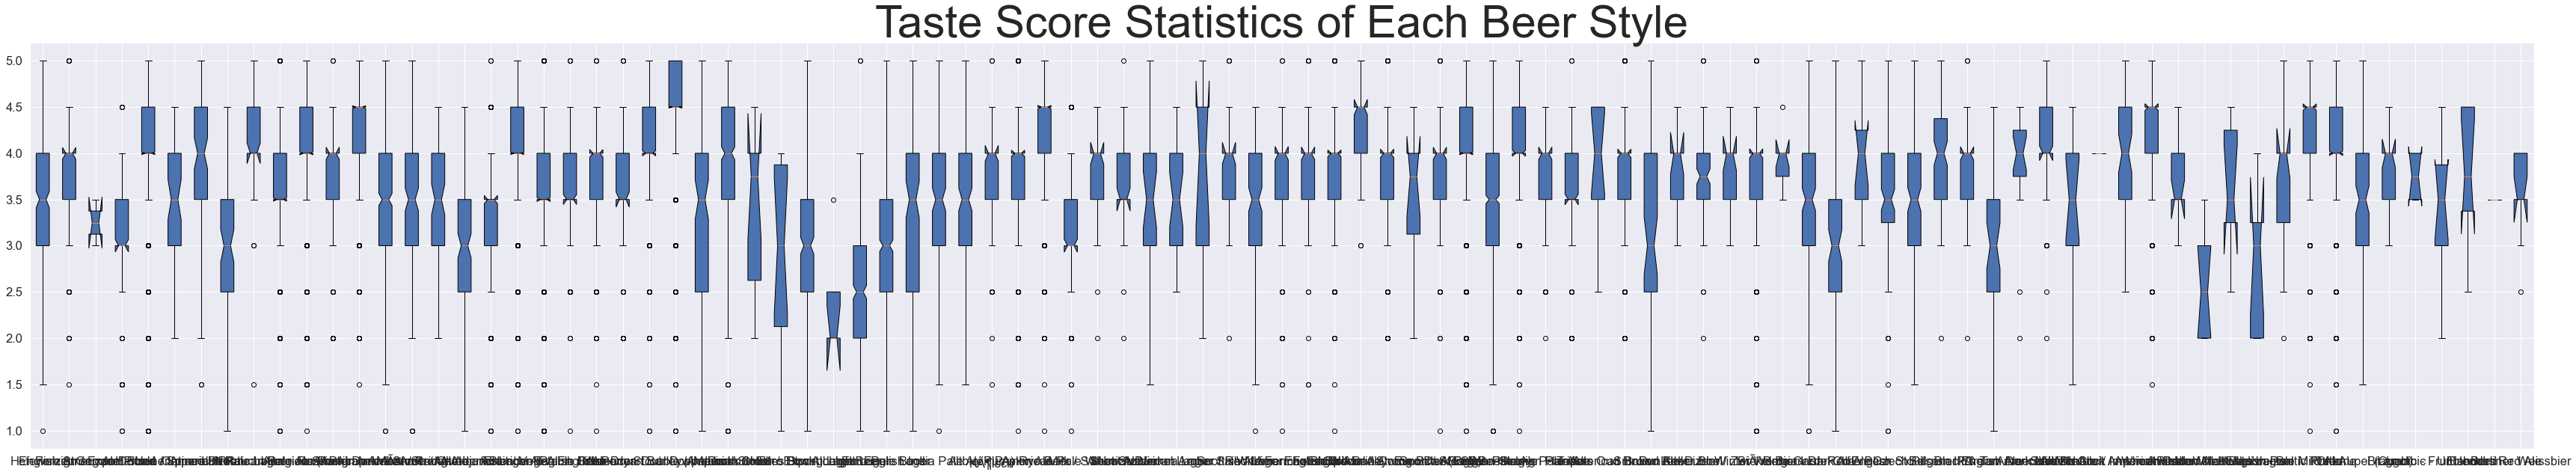

In [188]:
# aroma rating
all_data = [BeerStylesTaste[k] for k in BeerStyles.keys()]
labels = BeerStyles.keys()
fig, ax = plt.subplots(figsize = (60,10))
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Taste Score Statistics of Each Beer Style', fontsize=60) 
print(np.mean([np.std(BeerStylesTaste[k]) for k in BeerStyles.keys()]))

In [303]:
import numpy as np
import pickle

file = open("BeerStyles.pkl","rb")
BeerStyles = pickle.load(file)
file.close()

file = open("BeerStylesAppearance.pkl","rb")
BeerStylesAppearance = pickle.load(file)
file.close()

file = open("BeerStylesAroma.pkl","rb")
BeerStylesAroma = pickle.load(file)
file.close()

file = open("BeerStylesPalate.pkl","rb")
BeerStylesPalate = pickle.load(file)
file.close()

file = open("BeerStylesTaste.pkl","rb")
BeerStylesTaste = pickle.load(file)
file.close()

def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

### predict mean
y_train = [d['review/overall'] for d in train]
y_test = [d['review/overall'] for d in test]

BeerStylesAppearanceMean = {}
BeerStylesAromaMean = {}
BeerStylesPalateMean = {}
BeerStylesTasteMean = {}

for key in BeerStyles.keys():
    BeerStylesAppearanceMean[key] = np.mean(BeerStylesAppearance[key])
    BeerStylesAromaMean[key] = np.mean(BeerStylesAroma[key])
    BeerStylesPalateMean[key] = np.mean(BeerStylesPalate[key])
    BeerStylesTasteMean[key] = np.mean(BeerStylesTaste[key])
    
pred_train = [(BeerStylesAppearanceMean[d['beer/style']]+BeerStylesAromaMean[d['beer/style']]+BeerStylesPalateMean[d['beer/style']]+BeerStylesTasteMean[d['beer/style']])/4 for d in train]
pred_test = [(BeerStylesAppearanceMean[d['beer/style']]+BeerStylesAromaMean[d['beer/style']]+BeerStylesPalateMean[d['beer/style']]+BeerStylesTasteMean[d['beer/style']])/4 for d in test]

print("MSEtrain = ",MSE(y_train, pred_train))
print("MSEtest = ",MSE(y_test, pred_test))


MSEtrain =  0.4011872913524021
MSEtest =  0.6073063334501348


(0.0, 5.0)

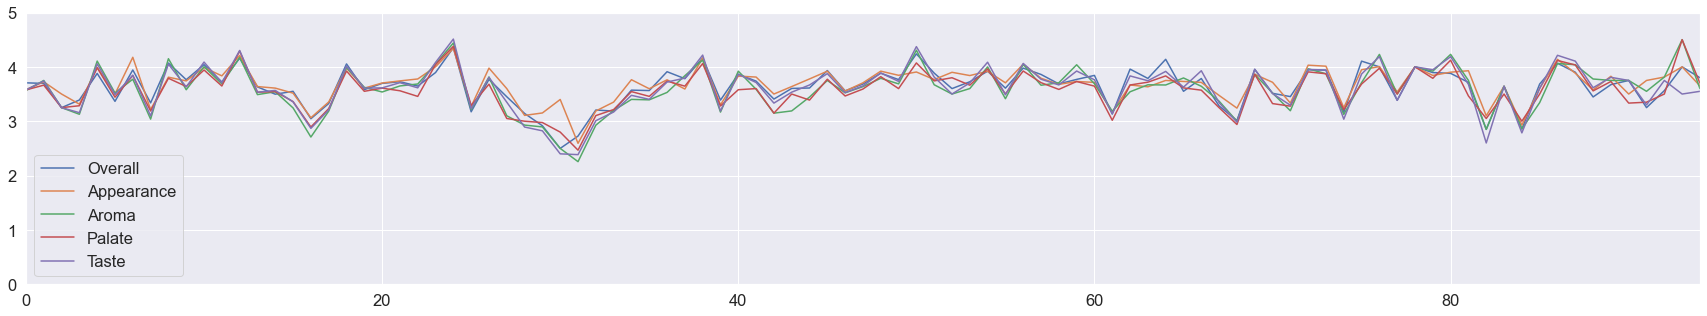

In [183]:
# aroma rating
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (30,5))
ax = fig.add_subplot(111)
ax.plot([np.mean(BeerStylesOverall[k]) for k in BeerStyles.keys()],label='Overall')
ax.plot([np.mean(BeerStylesAppearance[k]) for k in BeerStyles.keys()],label='Appearance')
ax.plot([np.mean(BeerStylesAroma[k]) for k in BeerStyles.keys()],label='Aroma')
ax.plot([np.mean(BeerStylesPalate[k]) for k in BeerStyles.keys()],label='Palate')
ax.plot([np.mean(BeerStylesTaste[k]) for k in BeerStyles.keys()],label='Taste')

plt.legend()
plt.xlim(0, 94)
#plt.xlabel(list(BeerStyles.keys()))
plt.ylim(0, 5)

#ax.set_xticks(BeerStyles.keys())
# fix plot

Text(0.5, 1.0, 'Score Boxplot for Training Set')

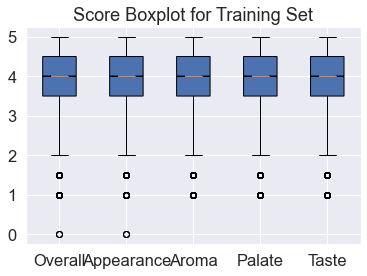

In [112]:
import matplotlib.pyplot as plt
import numpy as np

all_data = [[d['review/overall'] for d in train],
            [d['review/appearance'] for d in train],
            [d['review/aroma'] for d in train],
            [d['review/palate'] for d in train],
            [d['review/taste'] for d in train]]
labels = ['Overall', 'Appearance', 'Aroma','Palate','Taste']
fig, ax = plt.subplots()
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Score Boxplot for Training Set')

Text(0.5, 1.0, 'Score Boxplot for Testing Set')

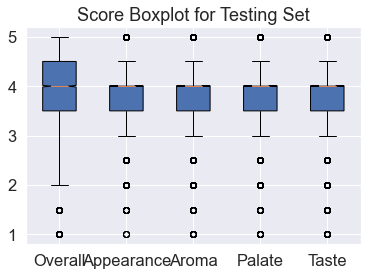

In [113]:
import matplotlib.pyplot as plt
import numpy as np

all_data = [[d['review/overall'] for d in test],
            [d['review/appearance'] for d in test],
            [d['review/aroma'] for d in test],
            [d['review/palate'] for d in test],
            [d['review/taste'] for d in test]]
labels = ['Overall', 'Appearance', 'Aroma','Palate','Taste']
fig, ax = plt.subplots()
ax.boxplot(all_data,
            notch=True,  # notch shape
            vert=True,  # vertical box alignment
            patch_artist=True,  # fill with color
            labels=labels)  # will be used to label x-ticks
ax.set_title('Score Boxplot for Testing Set')

# Linear Model with Beer Style Bias

In [33]:
import numpy as np
BeerStyleBias = defaultdict(float)
for k in BeerStyles.keys():
    BeerStyleBias[k] = np.mean(BeerStylesOverall[k])-OverallMean
    
BrewerIdBias = defaultdict(float)
for k in BrewerId.keys():
    BrewerIdBias[k] = np.mean(BrewerIdOverall[k])-OverallMean

file = open("BeerStyleBias.pkl","wb")
pickle.dump(BeerStyleBias,file)
file.close()

file = open("BrewerIdBias.pkl","wb")
pickle.dump(BrewerIdBias,file)
file.close()

In [202]:
def feature(datum):
    feat = [1]*5
    
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

X_train = [feature(d) for d in train]
X_test = [feature(d) for d in test]

In [203]:
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2

y_train_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]) for d in train]
y_test_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]) for d in test]
    
clf.fit(X_train, y_train_)
theta = clf.coef_

pred_train = [0]*len(train)
pred_train_ = clf.predict(X_train)
for i in range(len(train)) :
    pred_train[i] = BeerStyleBias[train[i]['beer/style']]+pred_train_[i]

pred_test = [0]*len(test)
pred_test_ = clf.predict(X_test)
for i in range(len(test)) :
    pred_test[i] = BeerStyleBias[test[i]['beer/style']]+pred_test_[i]
    
print(theta[:20])
print("MSEtrain = ",MSE(y_train, pred_train))
print("MSEtest = ",MSE(y_test, pred_test))

weights = list(zip(theta, ['bias','appearance','aroma','palate','taste']))
weights.sort()
weights.reverse()
print(weights)

[ 1.79488881 -0.04924986 -0.04560053  0.1774116   0.45330169]
MSEtrain =  0.2420072459149375
MSEtest =  0.38948720683694404
[(1.7948888131797578, 'bias'), (0.45330169115498536, 'taste'), (0.177411596323696, 'palate'), (-0.04560052698909265, 'aroma'), (-0.04924986086167681, 'appearance')]


<img src="problem2.PNG">

In [99]:
print(BeerStyleBias.keys())


dict_keys(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout', 'German Pilsener', 'American Double / Imperial IPA', 'Herbed / Spiced Beer', 'Oatmeal Stout', 'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)', 'American Porter', 'Belgian Strong Dark Ale', 'Russian Imperial Stout', 'American Amber / Red Ale', 'American Strong Ale', 'MÃ¤rzen / Oktoberfest', 'American Adjunct Lager', 'American Blonde Ale', 'American IPA', 'Fruit / Vegetable Beer', 'English Bitter', 'English Porter', 'Irish Dry Stout', 'American Barleywine', 'American Double / Imperial Stout', 'Doppelbock', 'American Stout', 'Maibock / Helles Bock', 'Dortmunder / Export Lager', 'Euro Strong Lager', 'Low Alcohol Beer', 'Light Lager', 'Euro Pale Lager', 'Bock', 'English India Pale Ale (IPA)', 'Altbier', 'KÃ¶lsch', 'Pumpkin Ale', 'Rye Beer', 'American Pale Wheat Ale', 'Milk / Sweet Stout', 'Schwarzbier', 'Munich Dunkel Lager', 'Vienna Lager', 'American Amber / Red Lager', 'Scottish Ale', 'Witbier', 'Saison

In [25]:
print(BeerStyleBias)
# plot


defaultdict(<class 'float'>, {'Hefeweizen': -0.195648387096774, 'English Strong Ale': -0.2065871794871792, 'Foreign / Export Stout': -0.6520999999999999, 'German Pilsener': -0.5115890510948904, 'American Double / Imperial IPA': -0.02286135636596276, 'Herbed / Spiced Beer': -0.5367153846153845, 'Oatmeal Stout': 0.04108181818181844, 'American Pale Lager': -0.5644376623376623, 'Rauchbier': 0.16790000000000038, 'American Pale Ale (APA)': -0.13815947955390318, 'American Porter': 0.13844054054054045, 'Belgian Strong Dark Ale': -0.1802690140845069, 'Russian Imperial Stout': 0.25731220238095265, 'American Amber / Red Ale': -0.27089432624113474, 'American Strong Ale': -0.40513030303030284, 'MÃ¤rzen / Oktoberfest': -0.3521000000000001, 'American Adjunct Lager': -0.8560007092198583, 'American Blonde Ale': -0.5765548286604361, 'American IPA': 0.1522421736869477, 'Fruit / Vegetable Beer': -0.3214190229459657, 'English Bitter': -0.20634528301886768, 'English Porter': -0.17532404371584676, 'Irish Dry

In [26]:
print(BrewerIdBias)
# plot

defaultdict(<class 'float'>, {'10325': -1.2771, '1075': 0.052188939051919014, '8802': -0.5132111111111111, '2724': -0.46966756756756745, '7345': 0.0979000000000001, '163': -1.1133676056338029, '3407': -0.1520999999999999, '11715': 0.0354000000000001, '18185': -0.9020999999999999, '1463': -1.2296862068965515, '1454': 0.1715434108527134, '850': -0.07902307692307664, '577': -0.19138571428571405, '14756': -0.3687666666666667, '24162': 0.26456666666666706, '21841': -0.06281428571428549, '13614': -0.027099999999999902, '26612': -0.3306714285714283, '25484': -0.06876666666666642, '13956': -2.4021, '26983': -0.4020999999999999, '17293': -0.20209999999999972, '26990': 0.2557947368421054, '24517': 0.0979000000000001, '21138': -0.20209999999999972, '16859': 0.028132558139534858, '23246': -0.044957142857142696, '7314': 0.0979000000000001, '18847': -0.1520999999999999, '23082': -0.4020999999999999, '2188': -0.4020999999999999, '15527': -0.17133076923076906, '20658': -0.3425761904761906, '10103': -0

# Linear Model with Two Bias

In [27]:
clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2

y_train_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]-BrewerIdBias[d['beer/brewerId']]) for d in train]
y_test_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]-BrewerIdBias[d['beer/brewerId']]) for d in test]
    
clf.fit(X_train, y_train_)
theta = clf.coef_

pred_train = [0]*len(train)
pred_train_ = clf.predict(X_train)
for i in range(len(train)) :
    pred_train[i] = BeerStyleBias[train[i]['beer/style']]+BrewerIdBias[train[i]['beer/brewerId']]+pred_train_[i]

pred_test = [0]*len(test)
pred_test_ = clf.predict(X_test)
for i in range(len(test)) :
    pred_test[i] = BeerStyleBias[test[i]['beer/style']]+BrewerIdBias[test[i]['beer/brewerId']]+pred_test_[i]
    
print(theta[:20])
print("MSEtrain = ",MSE(y_train, pred_train))
print("MSEtest = ",MSE(y_test, pred_test))

weights = list(zip(theta, ['bias','appearance','aroma','palate','taste']))
weights.sort()
weights.reverse()
print(weights)
# plot

[ 3.08794842 -0.12452079 -0.16053159  0.10892554  0.3811971 ]
MSEtrain =  0.3729138521989581
MSEtest =  0.4357236953411903
[(3.087948421633951, 'bias'), (0.3811971006939633, 'taste'), (0.10892553867400986, 'palate'), (-0.12452078869026341, 'appearance'), (-0.16053158706680049, 'aroma')]


# Two Bias TDIDF

In [34]:

import string
from nltk.corpus import stopwords

wordCount = defaultdict(int)
punct = string.punctuation

cnt = 0
for d in train :
    cnt+=1
    if cnt%100==0 : print(cnt)
    #print(d['review/text'])
    r = ''.join([c for c in d['review/text'].lower() if (not c in punct)])
    #print(r)
    for w in r.split():
        if w not in stopwords.words('english'):
             wordCount[w] += 1
        #w = stemmer.stem(w)
        #print(w)
       
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
print(counts)

file = open("wordCount.pkl","wb")
pickle.dump(wordCount,file)
file.close()

np.save('counts.npy', np.asarray(counts))


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [37]:
file = open("wordCount.pkl","rb")
wordCount = pickle.load(file)
file.close()

counts = np.load('counts.npy')

In [40]:
import math
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

def feature(datum):
    feat = [1]*5
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

def train_with_tfidf(num_words):
    top_words = [w[1] for w in counts[:num_words]]
    print([(w,wordCount[w]) for w in top_words])
    #print(np.asarray([feature(d) for d in train]).shape)
    #print(np.asarray(tfidf_train).shape)

    # tf 
    tfidf_train = []
    for d in train :
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if w in top_words:
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        #tfidf = dict(zip(top_words,[tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]))
        tfidf = [tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]
        tfidf_train.append(tfidf)

    tfidf_test = []
    for d in test :
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if w in top_words:
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        #tfidf = dict(zip(top_words,[tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]))
        tfidf = [tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]
        tfidf_test.append(tfidf)
    
    X_train = np.hstack(([feature(d) for d in train],tfidf_train))
    X_test = np.hstack(([feature(d) for d in test],tfidf_test))
    
        
    clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
    y_train_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]-BrewerIdBias[d['beer/brewerId']]) for d in train]
    y_test_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]-BrewerIdBias[d['beer/brewerId']]) for d in test]

    print(X_train.shape)
    clf.fit(X_train, y_train_)
    theta = clf.coef_

    pred_train = [0]*len(train)
    pred_train_ = clf.predict(X_train)
    for i in range(len(train)) :
        pred_train[i] = BeerStyleBias[train[i]['beer/style']]+BrewerIdBias[train[i]['beer/brewerId']]+pred_train_[i]

    pred_test = [0]*len(test)
    pred_test_ = clf.predict(X_test)
    for i in range(len(test)) :
        pred_test[i] = BeerStyleBias[test[i]['beer/style']]+BrewerIdBias[test[i]['beer/brewerId']]+pred_test_[i]

    #print(theta[:20])
    print("MSEtrain = ",MSE(y_train, pred_train))
    print("MSEtest = ",MSE(y_test, pred_test))

    weights = list(zip(theta, ['bias','appearance','aroma','palate','taste']+top_words))
    weights.sort()
    weights.reverse()
    print(weights)
    
    # plot weights

In [41]:
for n in [100,200,400,800]:
    print(n)
    train_with_tfidf(n)
    print()


100
[('beer', 49709), ('head', 38919), ('taste', 27935), ('nice', 26030), ('good', 24273), ('like', 23108), ('malt', 22922), ('dark', 22918), ('one', 22660), ('hops', 22320), ('sweet', 21629), ('chocolate', 20298), ('light', 19963), ('coffee', 19503), ('bit', 18845), ('flavor', 18791), ('carbonation', 18111), ('well', 17097), ('little', 16637), ('aroma', 16474), ('glass', 16279), ('smell', 15495), ('alcohol', 15161), ('finish', 15000), ('mouthfeel', 14623), ('bottle', 14554), ('pours', 14548), ('lacing', 14261), ('color', 13858), ('hop', 13849), ('really', 13004), ('brown', 12956), ('body', 12495), ('caramel', 12396), ('much', 12299), ('bitter', 11842), ('poured', 11717), ('smooth', 11486), ('bitterness', 11442), ('black', 11405), ('great', 11171), ('malts', 10936), ('would', 10922), ('bourbon', 10872), ('medium', 10837), ('roasted', 10734), ('flavors', 10718), ('notes', 10574), ('nose', 10553), ('thick', 9956), ('sweetness', 9502), ('pretty', 8889), ('citrus', 8841), ('creamy', 8685),

(40000, 205)
MSEtrain =  0.3105487302494788
MSEtest =  0.3365829941929914
[(2.4486811749537845, 'bias'), (0.39486068552416304, 'taste'), (0.1359885676149245, 'palate'), (0.07567768192076677, 'light'), (0.04295757500442442, 'drinkable'), (0.03659665275698223, 'easy'), (0.02980648323474137, 'clear'), (0.026599628303239486, 'pale'), (0.025367328147005864, 'best'), (0.024582481284833004, 'beers'), (0.02423798468853392, 'white'), (0.024050918872808774, 'nice'), (0.024004209077577734, 'golden'), (0.023891576991938352, 'clean'), (0.021676689000341913, 'good'), (0.017006145619966086, 'malt'), (0.016890289412758604, 'crisp'), (0.016624495432708886, 'well'), (0.01639646593418418, 'lace'), (0.013409847758693645, 'better'), (0.013225613703174297, 'could'), (0.011836563870583895, 'great'), (0.011798187480500754, 'slightly'), (0.0111636406619764, 'aroma'), (0.010957218976609787, 'smooth'), (0.009591427627675191, 'bad'), (0.009470239702275014, 'medium'), (0.009158687174084362, 'hint'), (0.00849042467

(40000, 405)
MSEtrain =  0.29589990149288936
MSEtest =  0.32879519753563635
[(2.360600614090081, 'bias'), (0.39065035862898045, 'taste'), (0.14457634137127176, 'palate'), (0.062056382812897985, 'light'), (0.03994641244701822, 'drinkable'), (0.03944442941164469, 'yellow'), (0.03362680014383136, 'watery'), (0.03339224747759143, 'easy'), (0.032831054722716406, 'gold'), (0.023908070331059607, 'refreshing'), (0.02279825812588901, 'good'), (0.022562349894427427, 'grain'), (0.02253240368873167, 'grainy'), (0.021906303186131033, 'clear'), (0.021623327519690802, 'beers'), (0.021419177688101823, 'nice'), (0.02085754478271157, 'best'), (0.019830888187351244, 'label'), (0.019481552364390354, 'golden'), (0.018288567089979446, 'malt'), (0.017347776165021162, 'clean'), (0.015764626679194944, 'white'), (0.01499863896401646, 'day'), (0.014986656865208562, 'well'), (0.014849061828005211, 'pale'), (0.014622342374392208, 'american'), (0.013978403952074206, 'easily'), (0.013406283151156079, 'excellent'), (


800
[('beer', 49709), ('head', 38919), ('taste', 27935), ('nice', 26030), ('good', 24273), ('like', 23108), ('malt', 22922), ('dark', 22918), ('one', 22660), ('hops', 22320), ('sweet', 21629), ('chocolate', 20298), ('light', 19963), ('coffee', 19503), ('bit', 18845), ('flavor', 18791), ('carbonation', 18111), ('well', 17097), ('little', 16637), ('aroma', 16474), ('glass', 16279), ('smell', 15495), ('alcohol', 15161), ('finish', 15000), ('mouthfeel', 14623), ('bottle', 14554), ('pours', 14548), ('lacing', 14261), ('color', 13858), ('hop', 13849), ('really', 13004), ('brown', 12956), ('body', 12495), ('caramel', 12396), ('much', 12299), ('bitter', 11842), ('poured', 11717), ('smooth', 11486), ('bitterness', 11442), ('black', 11405), ('great', 11171), ('malts', 10936), ('would', 10922), ('bourbon', 10872), ('medium', 10837), ('roasted', 10734), ('flavors', 10718), ('notes', 10574), ('nose', 10553), ('thick', 9956), ('sweetness', 9502), ('pretty', 8889), ('citrus', 8841), ('creamy', 8685)

(40000, 805)
MSEtrain =  0.2804865331705631
MSEtest =  0.33273476484238085
[(2.2616328185053236, 'bias'), (0.3868911967766455, 'taste'), (0.14989663740912196, 'palate'), (0.05781654774566228, 'lager'), (0.0564215246514411, 'light'), (0.03673693241706037, 'drinkable'), (0.03374345757464482, 'yellow'), (0.029672772657843693, 'easy'), (0.029427523929109883, 'watery'), (0.02855500214481629, 'gold'), (0.02565811284735401, 'colour'), (0.02302280466730696, 'water'), (0.019588250123693002, 'refreshing'), (0.019057120142576232, 'grainy'), (0.01866230133144818, 'nice'), (0.018106470891119816, 'straw'), (0.017953790820734745, 'beers'), (0.017598941541587, 'grain'), (0.017475939573517254, 'surprised'), (0.01744857614710955, 'best'), (0.017243215567463745, 'clear'), (0.017169382367061444, 'malt'), (0.01661337552922781, 'good'), (0.01618481117900765, 'case'), (0.016113227516533893, 'golden'), (0.016062759842122083, 'price'), (0.01546096814021586, 'label'), (0.015287922729342259, 'english'), (0.01437

100
MSEtrain =  0.3261577328656047
MSEtest =  0.3561133921669598

200
MSEtrain =  0.3105487302494788
MSEtest =  0.3365829941929914

400
MSEtrain =  0.29589990149288936
MSEtest =  0.32879519753563635

800
MSEtrain =  0.2804865331705631
MSEtest =  0.33273476484238085

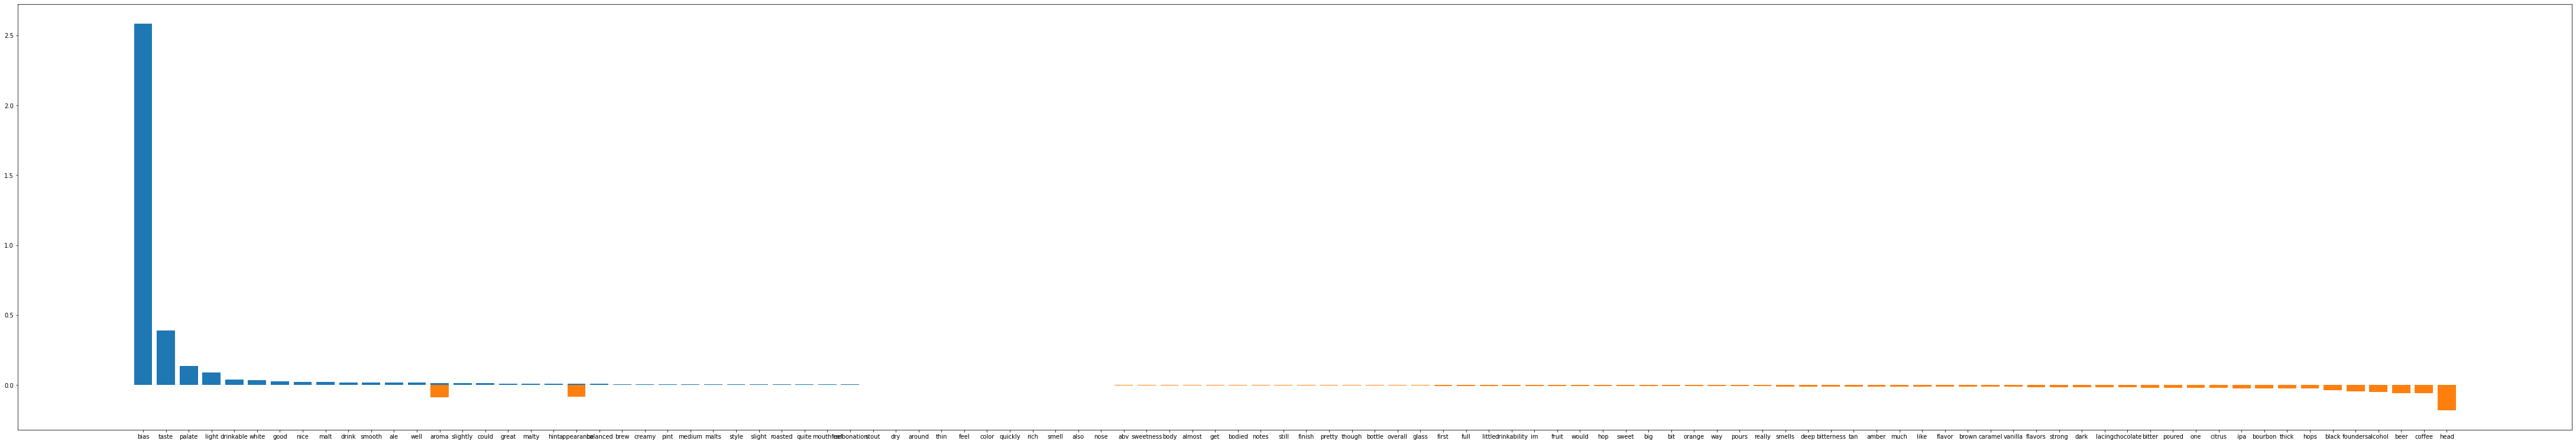

['bias', 'taste', 'palate', 'light', 'drinkable', 'white', 'good', 'nice', 'malt', 'drink', 'smooth', 'ale', 'well', 'aroma', 'slightly', 'could', 'great', 'malty', 'hint', 'appearance', 'balanced', 'taste', 'brew', 'creamy', 'pint', 'medium', 'malts', 'style', 'slight', 'roasted', 'quite', 'mouthfeel', 'carbonation', 'stout', 'dry', 'around', 'thin', 'feel', 'color', 'quickly', 'rich', 'smell']
['also', 'nose', 'abv', 'sweetness', 'body', 'almost', 'get', 'bodied', 'notes', 'still', 'finish', 'pretty', 'though', 'bottle', 'overall', 'glass', 'first', 'full', 'little', 'drinkability', 'im', 'fruit', 'would', 'hop', 'sweet', 'big', 'bit', 'orange', 'way', 'pours', 'really', 'smells', 'deep', 'bitterness', 'tan', 'amber', 'much', 'like', 'flavor', 'brown', 'caramel', 'vanilla', 'flavors', 'strong', 'dark', 'lacing', 'chocolate', 'bitter', 'poured', 'one', 'citrus', 'ipa', 'bourbon', 'thick', 'hops', 'black', 'founders', 'alcohol', 'beer', 'coffee', 'appearance', 'aroma', 'head']


In [32]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60,10))
ax = fig.add_axes([0,0,1,1])
data = [(2.586157415447017, 'bias'), (0.3913911674469936, 'taste'), (0.13808626271039087, 'palate'), (0.09121411619165126, 'light'), (0.039835408073097774, 'drinkable'), (0.0351234881553035, 'white'), (0.025735687811730374, 'good'), (0.02442806756681847, 'nice'), (0.02138415161436232, 'malt'), (0.01826993369876486, 'drink'), (0.017906606856957205, 'smooth'), (0.016977967224078575, 'ale'), (0.016563412385916704, 'well'), (0.014320016374977205, 'aroma'), (0.013597974894437315, 'slightly'), (0.012519467334360638, 'could'), (0.011481661423877937, 'great'), (0.011161026582929666, 'malty'), (0.010729553569841, 'hint'), (0.009265050239989133, 'appearance'), (0.009041373446150707, 'balanced'), (0.008883808469874382, 'taste'), (0.006582803187519224, 'brew'), (0.00588237718059251, 'creamy'), (0.005815107893830982, 'pint'), (0.0054599178012606575, 'medium'), (0.005412178547358594, 'malts'), (0.0053989105624864375, 'style'), (0.004980723955758545, 'slight'), (0.004695638322714524, 'roasted'), (0.004486666442484044, 'quite'), (0.004360163621588899, 'mouthfeel'), (0.0038921170495581415, 'carbonation'), (0.0032536249091843997, 'stout'), (0.00263545392513188, 'dry'), (0.0025898478765066816, 'around'), (0.0022925958435753946, 'thin'), (0.001763656227926584, 'feel'), (0.0016831719242231425, 'color'), (0.0015144326437030095, 'quickly'), (0.0012249109949534183, 'rich'), (0.00046684547850945734, 'smell'), (-0.0004243002749060685, 'also'), (-0.0004337794200492273, 'nose'), (-0.0007737401545924385, 'abv'), (-0.0009491057353518409, 'sweetness'), (-0.0009789076027807556, 'body'), (-0.0011085924143127417, 'almost'), (-0.001194896447362818, 'get'), (-0.0015568108087905192, 'bodied'), (-0.0018740837160047135, 'notes'), (-0.0020427159041663183, 'still'), (-0.0020787337861038397, 'finish'), (-0.002079999856789712, 'pretty'), (-0.003757066687641563, 'though'), (-0.003961445106984709, 'bottle'), (-0.004572088925682231, 'overall'), (-0.0048853396981255025, 'glass'), (-0.005337080120557602, 'first'), (-0.005416860952091979, 'full'), (-0.005666701279677943, 'little'), (-0.005728401092322572, 'drinkability'), (-0.005824425329473652, 'im'), (-0.005832857609906874, 'fruit'), (-0.0066036420065935676, 'would'), (-0.006857521261325721, 'hop'), (-0.00709654309562354, 'sweet'), (-0.0072604991312435465, 'big'), (-0.0076061050003220524, 'bit'), (-0.008132613934925292, 'orange'), (-0.00840291652466934, 'way'), (-0.00849346694351108, 'pours'), (-0.008807555115870733, 'really'), (-0.00914839403456838, 'smells'), (-0.009756386048269469, 'deep'), (-0.009900266123492537, 'bitterness'), (-0.01033864032491898, 'tan'), (-0.010456749725502892, 'amber'), (-0.010808176002359074, 'much'), (-0.01109755666218973, 'like'), (-0.011286757083274073, 'flavor'), (-0.011845095901354675, 'brown'), (-0.012063982068692919, 'caramel'), (-0.013315287624408683, 'vanilla'), (-0.013733560314230939, 'flavors'), (-0.014857564469522072, 'strong'), (-0.01592745063105443, 'dark'), (-0.016867885160744726, 'lacing'), (-0.017492673771129365, 'chocolate'), (-0.020637234760923676, 'bitter'), (-0.020872580260121048, 'poured'), (-0.021213950030308733, 'one'), (-0.02168173757222154, 'citrus'), (-0.02181609516339021, 'ipa'), (-0.024814415246599334, 'bourbon'), (-0.024952984185958316, 'thick'), (-0.025024679378454123, 'hops'), (-0.036816034603062237, 'black'), (-0.04350966581058218, 'founders'), (-0.050706305814923684, 'alcohol'), (-0.056724867233839786, 'beer'), (-0.058989544507715375, 'coffee'), (-0.08225241038625242, 'appearance'), (-0.0872336230099561, 'aroma'), (-0.18061638004386954, 'head')]
langs_positive = [d[1] for d in data if d[0]>=0]
students_positive = [d[0] for d in data if d[0]>=0]
ax.bar(langs_positive,students_positive)
langs_negative = [d[1] for d in data if d[0]<0]
students_negative = [d[0] for d in data if d[0]<0]
ax.bar(langs_negative,students_negative)
plt.show()
print(langs_positive)
print(langs_negative)

In [33]:
# 200
data = [(2.4486811749537845, 'bias'), (0.39486068552416304, 'taste'), (0.1359885676149245, 'palate'), (0.07567768192076677, 'light'), (0.04295757500442442, 'drinkable'), (0.03659665275698223, 'easy'), (0.02980648323474137, 'clear'), (0.026599628303239486, 'pale'), (0.025367328147005864, 'best'), (0.024582481284833004, 'beers'), (0.02423798468853392, 'white'), (0.024050918872808774, 'nice'), (0.024004209077577734, 'golden'), (0.023891576991938352, 'clean'), (0.021676689000341913, 'good'), (0.017006145619966086, 'malt'), (0.016890289412758604, 'crisp'), (0.016624495432708886, 'well'), (0.01639646593418418, 'lace'), (0.013409847758693645, 'better'), (0.013225613703174297, 'could'), (0.011836563870583895, 'great'), (0.011798187480500754, 'slightly'), (0.0111636406619764, 'aroma'), (0.010957218976609787, 'smooth'), (0.009591427627675191, 'bad'), (0.009470239702275014, 'medium'), (0.009158687174084362, 'hint'), (0.008490424673166031, 'malty'), (0.008376457072101499, 'taste'), (0.008280931149217814, 'appearance'), (0.008222244348180228, 'decent'), (0.007883073176742953, 'drink'), (0.007813741986852673, 'drinking'), (0.007750156354499183, 'nothing'), (0.007635774702739482, 'porter'), (0.0073246505972619285, 'aftertaste'), (0.006569670423490848, 'back'), (0.006064839400635407, 'brew'), (0.006020361640535662, 'even'), (0.006001203033368936, 'mild'), (0.0058805703319500385, 'aromas'), (0.005693286151123472, 'side'), (0.005568730447393022, 'theres'), (0.005502493514400786, 'balanced'), (0.00548978629384129, 'creamy'), (0.004993313835625863, 'solid'), (0.0046740854918258315, 'hints'), (0.004623345808604508, 'roasted'), (0.004614684446109804, 'quite'), (0.004610735510553852, 'touch'), (0.004485221910401866, 'another'), (0.004405646668034501, 'fresh'), (0.004348345147512822, 'slight'), (0.004237533134665992, 'doesnt'), (0.00412506074847758, 'right'), (0.003995914583914921, 'long'), (0.0038507892529043, 'top'), (0.003836938865210308, 'malts'), (0.0038302410950641088, 'low'), (0.003772796632550956, 'pint'), (0.0037381412224060163, 'enough'), (0.003709402262332583, 'nicely'), (0.0037072780301521022, 'around'), (0.003703028883177481, 'fairly'), (0.003650172350537299, 'ive'), (0.003589639439162971, 'leaves'), (0.0032329663251142956, 'fruity'), (0.0030644144281822385, 'mouthfeel'), (0.0030451719029183106, 'retention'), (0.002880212056490106, 'ale'), (0.0028252911866760116, 'come'), (0.0022615928256132264, 'spicy'), (0.0022405413754348095, 'stout'), (0.0021351921804218664, 'make'), (0.0018861501415327316, 'amount'), (0.0018596713326887704, 'feel'), (0.001855771461002437, 'love'), (0.0015895273524167426, 'end'), (0.0015193040352333741, 'smell'), (0.0014997074194024148, 'finger'), (0.0012827369933191295, 'nose'), (0.0012691733772049725, 'quickly'), (0.0012006036224050383, 'think'), (0.0011299117302418491, 'makes'), (0.0010383764775585968, 'bottle'), (0.0009643845082426731, 'balance'), (0.0005494390955156366, 'dry'), (0.0004640849857331042, 'style'), (0.0004356422618306183, 'get'), (0.00043006274815569223, 'present'), (0.00041137064724256834, 'see'), (0.00041091324218491687, 'carbonation'), (0.00034647525380667116, 'moderate'), (8.562495477845372e-05, 'character'), (6.89431089348082e-05, 'foam'), (3.7409967687694455e-05, 'almost'), (-7.084121992801797e-05, 'sugar'), (-0.00015688228233345081, 'earthy'), (-0.00016719382278496854, 'notes'), (-0.00017134905251288236, 'lot'), (-0.00019312587138635076, 'rich'), (-0.0006113219264703409, 'toffee'), (-0.0006559630714749223, 'left'), (-0.0006673248553914585, 'complex'), (-0.0009853876413126361, 'tongue'), (-0.0009995925401553693, 'also'), (-0.001279282797305691, 'comes'), (-0.0013631240281191536, 'maple'), (-0.0014123709846206828, 'sweetness'), (-0.0014853181788162103, 'tastes'), (-0.0016991106680929124, 'two'), (-0.0018935278553987086, 'thin'), (-0.001990706606364589, 'full'), (-0.0022147356364298283, 'abv'), (-0.0023200724288711515, 'color'), (-0.0024429091732263287, 'huge'), (-0.0025408059465266554, 'first'), (-0.002783968741144066, 'seems'), (-0.0030153812715884697, 'pretty'), (-0.0031506117299442194, 'oz'), (-0.0036364475253755444, 'time'), (-0.0036672556856455502, 'orange'), (-0.0036675737596102934, 'sip'), (-0.0038001706936176467, 'big'), (-0.0038026773411511, 'though'), (-0.004264701703902069, 'burnt'), (-0.00434481006745479, 'lots'), (-0.004504329235235342, 'drinkability'), (-0.004635517738699476, 'im'), (-0.0047284197357511356, 'would'), (-0.004758839278881958, 'still'), (-0.00480842122701459, 'bodied'), (-0.004928423482429929, 'caramel'), (-0.004945901936574305, 'sure'), (-0.004962701514637832, 'glass'), (-0.00497076784778969, 'sticky'), (-0.005107088443695213, 'palate'), (-0.005129666482700192, 'high'), (-0.00514668334408508, 'overall'), (-0.005167109455746905, 'mouth'), (-0.005241575364799459, 'presence'), (-0.005550483710749816, 'maybe'), (-0.005673891901976805, 'little'), (-0.005802400602011923, 'finish'), (-0.005929284415036619, 'id'), (-0.006394078466338472, 'deep'), (-0.006684020865586564, 'oak'), (-0.006893409083731648, 'tap'), (-0.006946403529243154, 'definitely'), (-0.007008051745513969, 'going'), (-0.0071811046082619285, 'really'), (-0.0073681622673168225, 'something'), (-0.007374474848795073, 'floral'), (-0.007485477684010466, 'hazy'), (-0.007562396962777835, 'sweet'), (-0.007603520392422234, 'body'), (-0.007764211582143545, 'tan'), (-0.0077891690590016025, 'try'), (-0.00779232261689624, 'front'), (-0.007806491174994547, 'red'), (-0.007897958417655072, 'hop'), (-0.008156833346376843, 'brown'), (-0.008201525988909046, 'pours'), (-0.008281500058505701, 'lacing'), (-0.008296374488610786, 'small'), (-0.008563383401740135, 'bit'), (-0.008713961501927011, 'fruit'), (-0.00873987417838723, 'bitterness'), (-0.008796284993563863, 'smells'), (-0.008802469698329667, 'thanks'), (-0.009003052976389316, 'hoppy'), (-0.009048954130132632, 'amber'), (-0.009055040642969026, 'like'), (-0.009260889232807488, 'way'), (-0.010435396931218067, 'much'), (-0.010731200715188042, 'dont'), (-0.01180088592049774, 'strong'), (-0.012131942787092901, 'dark'), (-0.012276152973517978, 'flavor'), (-0.012341649002518645, 'vanilla'), (-0.012396555604350143, 'flavors'), (-0.014308676688874216, 'pour'), (-0.014607045598676753, '12'), (-0.01585154419525609, 'bitter'), (-0.015942732833503302, 'pine'), (-0.016648959525162745, 'citrus'), (-0.017298657580536742, 'poured'), (-0.017760818735830956, 'grapefruit'), (-0.019276291951066067, 'heavy'), (-0.02047006703733597, 'ipa'), (-0.020959857138206563, 'hops'), (-0.02136656918534068, 'thick'), (-0.02167398619248354, 'chocolate'), (-0.022036092452684855, 'rye'), (-0.022733906183663107, 'bourbon'), (-0.029342931947192497, 'one'), (-0.03519658212494868, 'black'), (-0.04197752588595638, 'founders'), (-0.04369014705295059, 'alcohol'), (-0.04776691784691084, 'beer'), (-0.06308670318728642, 'coffee'), (-0.06666780110011294, 'aroma'), (-0.07439093132155514, 'appearance'), (-0.16509999081546953, 'head')]

langs_positive = [d[1] for d in data if d[0]>=0]
students_positive = [d[0] for d in data if d[0]>=0]
ax.bar(langs_positive,students_positive)
langs_negative = [d[1] for d in data if d[0]<0]
students_negative = [d[0] for d in data if d[0]<0]
print(langs_positive)
print(langs_negative)

['bias', 'taste', 'palate', 'light', 'drinkable', 'easy', 'clear', 'pale', 'best', 'beers', 'white', 'nice', 'golden', 'clean', 'good', 'malt', 'crisp', 'well', 'lace', 'better', 'could', 'great', 'slightly', 'aroma', 'smooth', 'bad', 'medium', 'hint', 'malty', 'taste', 'appearance', 'decent', 'drink', 'drinking', 'nothing', 'porter', 'aftertaste', 'back', 'brew', 'even', 'mild', 'aromas', 'side', 'theres', 'balanced', 'creamy', 'solid', 'hints', 'roasted', 'quite', 'touch', 'another', 'fresh', 'slight', 'doesnt', 'right', 'long', 'top', 'malts', 'low', 'pint', 'enough', 'nicely', 'around', 'fairly', 'ive', 'leaves', 'fruity', 'mouthfeel', 'retention', 'ale', 'come', 'spicy', 'stout', 'make', 'amount', 'feel', 'love', 'end', 'smell', 'finger', 'nose', 'quickly', 'think', 'makes', 'bottle', 'balance', 'dry', 'style', 'get', 'present', 'see', 'carbonation', 'moderate', 'character', 'foam', 'almost']
['sugar', 'earthy', 'notes', 'lot', 'rich', 'toffee', 'left', 'complex', 'tongue', 'also'

In [309]:

400
data = [(2.360600614090081, 'bias'), (0.39065035862898045, 'taste'), (0.14457634137127176, 'palate'), (0.062056382812897985, 'light'), (0.03994641244701822, 'drinkable'), (0.03944442941164469, 'yellow'), (0.03362680014383136, 'watery'), (0.03339224747759143, 'easy'), (0.032831054722716406, 'gold'), (0.023908070331059607, 'refreshing'), (0.02279825812588901, 'good'), (0.022562349894427427, 'grain'), (0.02253240368873167, 'grainy'), (0.021906303186131033, 'clear'), (0.021623327519690802, 'beers'), (0.021419177688101823, 'nice'), (0.02085754478271157, 'best'), (0.019830888187351244, 'label'), (0.019481552364390354, 'golden'), (0.018288567089979446, 'malt'), (0.017347776165021162, 'clean'), (0.015764626679194944, 'white'), (0.01499863896401646, 'day'), (0.014986656865208562, 'well'), (0.014849061828005211, 'pale'), (0.014622342374392208, 'american'), (0.013978403952074206, 'easily'), (0.013406283151156079, 'excellent'), (0.0131578935223335, 'better'), (0.012395201984137806, 'actually'), (0.012307561140173279, 'lace'), (0.01190485571355915, 'medium'), (0.011710285071425845, 'perfect'), (0.011146436846700001, 'crisp'), (0.010701397961609639, 'wonderful'), (0.01062145806961941, 'malty'), (0.010401365702609732, 'pleasant'), (0.010082745137282753, 'slightly'), (0.009748368645234939, 'stuff'), (0.009664782796092947, 'never'), (0.009588821029202313, 'great'), (0.009214381148096203, 'decent'), (0.009156147639605823, 'smooth'), (0.008996637460469805, 'drinking'), (0.008757156935432896, 'slowly'), (0.00860189772165975, 'without'), (0.008579116011468609, 'session'), (0.00852089148691491, 'yet'), (0.00849237045583866, 'bad'), (0.008471044385311528, 'favorite'), (0.008263948080965785, 'could'), (0.008147581259751584, 'bread'), (0.008116409002556868, 'awesome'), (0.007985102939655733, 'brewery'), (0.007921872151337665, 'fantastic'), (0.00791031317351452, 'found'), (0.007825278850160093, 'taste'), (0.0077892522414582345, 'maltiness'), (0.007606166536348132, 'leaving'), (0.007511607080331472, 'appearance'), (0.0071350275344537264, 'subtle'), (0.007114276668432681, 'drink'), (0.007047317670638842, 'hint'), (0.007035156982369531, 'ale'), (0.006723204324428369, 'find'), (0.006620973145875357, 'goes'), (0.006597771353966453, 'yeast'), (0.0064793578681136155, 'malts'), (0.006278428776972609, 'aroma'), (0.006241069188658145, 'soft'), (0.006203255535043388, 'real'), (0.006023050781591581, 'aftertaste'), (0.005880160116158814, 'isnt'), (0.005681462145582364, 'amazing'), (0.005680114154461937, 'lightly'), (0.00556518295273057, 'milk'), (0.005485148177815003, 'tasty'), (0.005451775340792194, 'worth'), (0.005436885704904068, 'nothing'), (0.0053900412141391005, 'dissipates'), (0.005048322380305723, 'enjoyable'), (0.005034312806809529, 'stout'), (0.005011234883668985, 'back'), (0.00494542596443539, 'finishes'), (0.00482739081418883, 'beautiful'), (0.004748987081808729, 'balanced'), (0.004743512100055956, 'offwhite'), (0.0047315179257359065, 'mild'), (0.004658126643397847, 'low'), (0.0046442116933957615, 'ever'), (0.004614833094690947, 'made'), (0.004574920881594698, 'however'), (0.004558801731602291, 'bottle'), (0.004542803771488621, 'delicious'), (0.004533082047681548, 'faint'), (0.004418583413489896, 'even'), (0.004219810575865627, 'honey'), (0.004135099849167026, 'thought'), (0.004098598802807041, 'side'), (0.004064335651988336, 'thats'), (0.00403689477024422, 'know'), (0.004031267905754822, 'last'), (0.003944673430941723, 'fairly'), (0.003919018626077227, 'theres'), (0.0039047817959034655, 'leaves'), (0.0038937144977128618, 'level'), (0.0038327218713779115, 'right'), (0.0037548378733649615, 'solid'), (0.0037433571092895593, 'slight'), (0.0037250403985992185, 'around'), (0.003724049216933736, 'nicely'), (0.0037206328193933923, 'frothy'), (0.003652552591054149, 'long'), (0.0036200327310248843, 'aromas'), (0.0034742205799939054, 'different'), (0.003382415972079651, 'many'), (0.0033802317051428834, 'porter'), (0.0033327001590572427, 'backbone'), (0.0033166346458788896, 'quality'), (0.0032693685221057895, 'doesnt'), (0.00326483847133856, 'roasted'), (0.003166378673998863, 'cap'), (0.0030012164338623173, 'roast'), (0.002985820094319824, 'think'), (0.002939111748029796, 'come'), (0.0029385449906722365, 'color'), (0.00285283158895746, 'reminds'), (0.0028152284264695627, 'edges'), (0.002708502284065991, 'go'), (0.0026849684832432417, 'may'), (0.002596682816405468, 'fresh'), (0.002478138010780067, 'smoke'), (0.0024436348486655958, 'herbal'), (0.0024211833490910832, 'love'), (0.002418371535631924, 'end'), (0.002412892983489532, 'sugar'), (0.002410849760736956, 'creamy'), (0.0024063585936329097, 'year'), (0.0023409578802939856, 'cream'), (0.0023406816212776264, 'similar'), (0.0023247556652694827, 'looking'), (0.002298707312987897, 'bready'), (0.002255584631542007, 'another'), (0.0022065543335210596, 'brew'), (0.002189941191990157, 'top'), (0.00215329415957007, 'quite'), (0.002055808857266344, 'starts'), (0.002048066916187397, 'plenty'), (0.002038333511511465, 'touch'), (0.002030257020757941, 'done'), (0.0020213994249519175, 'hints'), (0.0020105939047053737, 'finger'), (0.0019499602138457611, 'cocoa'), (0.001885401099823447, 'every'), (0.0018693270329234255, 'make'), (0.001802127187730702, 'enough'), (0.0017731811552228799, 'warming'), (0.0016920636080894368, 'behind'), (0.0016424787652874501, 'aged'), (0.0016167188710069847, 'amount'), (0.0016083092572210112, 'get'), (0.0015900589693889707, 'maple'), (0.0015592633661141735, 'almost'), (0.0014758551598829637, 'far'), (0.0014316275045123013, 'ive'), (0.0013885610827090902, 'retention'), (0.001356550755962012, 'bubbles'), (0.001300765666806721, 'along'), (0.0011793092548137458, 'toasted'), (0.0011438950292431405, 'fine'), (0.001143028736780189, 'bright'), (0.0011426458287163083, 'although'), (0.0010903192442121234, 'see'), (0.00104099670253007, 'carbonated'), (0.0009895655864795036, 'somewhat'), (0.0009744737109378663, 'copper'), (0.0009322844315615016, 'note'), (0.0009084966720677113, 'lingering'), (0.0008884403681337477, 'fruity'), (0.0008857594385488315, 'enjoyed'), (0.0008523395101402164, 'toffee'), (0.0008367000483844944, 'extremely'), (0.0008198180094985102, 'hidden'), (0.0008181424325600569, 'middle'), (0.0007411969413951571, 'grassy'), (0.000665922196673188, 'noticeable'), (0.0006070288832768985, 'lot'), (0.0005679896021320295, 'makes'), (0.000493019425515475, 'rich'), (0.0004783487683916783, 'moderate'), (0.0004460256776500394, 'coming'), (0.0004311513380606696, 'present'), (0.00033734966538220563, 'spicy'), (0.00033283073199137577, 'take'), (0.0003237338538415683, 'feel'), (0.0003110399193503032, 'background'), (0.00030975115155064647, 'perhaps'), (0.00028167365014702706, 'say'), (0.00022186738659678027, 'pint'), (0.00017331895992866338, 'quickly'), (9.09754726594953e-05, 'overly'), (6.62625236768977e-05, 'fruits'), (3.4545960767960926e-05, 'ill'), (3.6132172669992394e-06, 'wow'), (-0.00010234447932526395, 'mouthfeel'), (-0.000122352837387524, 'carbonation'), (-0.00016189044025483761, 'mix'), (-0.00028014745546592595, 'ruby'), (-0.00029745744587203514, '2'), (-0.0003245196437690925, 'imperial'), (-0.00034116684259683823, 'caramel'), (-0.00041602703405061234, 'roasty'), (-0.0004564304637319416, 'left'), (-0.0005135237223068193, 'certainly'), (-0.0005496713238171279, 'warms'), (-0.0005738891955193877, 'followed'), (-0.0006516293409732671, 'molasses'), (-0.0006605627959819227, 'belgian'), (-0.0006808567345180853, 'notes'), (-0.0006887608706594513, 'dry'), (-0.0006996182336324363, 'also'), (-0.0007051598548588584, 'half'), (-0.0008101083354611414, 'review'), (-0.0008341402453061433, 'earthy'), (-0.0008435859573439375, 'bite'), (-0.0008473738003206279, 'foamy'), (-0.0008577783491799084, 'barrel'), (-0.0008706567661785409, 'mostly'), (-0.0008760102992241618, 'looks'), (-0.0010029247296321803, 'hot'), (-0.0010182189923265456, 'smell'), (-0.0010552715073780044, 'espresso'), (-0.0011016978611880866, 'spice'), (-0.0012632669440730956, 'complexity'), (-0.0013257542811949585, 'balance'), (-0.0013335007927758923, 'tongue'), (-0.0013743651583742705, 'thing'), (-0.001400945677613561, 'complex'), (-0.0014210968745813444, 'average'), (-0.0014772005814774388, 'tastes'), (-0.0015079586983224628, 'expect'), (-0.0015529111240578485, 'start'), (-0.0015654461940513224, 'foam'), (-0.0015707192443833692, 'comes'), (-0.0016117961604050538, 'wheat'), (-0.0016193355072735753, 'huge'), (-0.001655190892815624, 'style'), (-0.0017174723610081746, 'profile'), (-0.00177501525279926, 'thin'), (-0.001871305291104739, 'pretty'), (-0.0019106843249081114, 'throughout'), (-0.0020029291296143497, 'give'), (-0.002099542693624945, 'less'), (-0.0021486895002692393, 'nose'), (-0.0021891689248294704, 'abv'), (-0.002230423636421404, 'expected'), (-0.00227838115885145, 'pumpkin'), (-0.002280598358905292, 'warm'), (-0.0023974349577657573, 'orange'), (-0.0023976458282693736, 'sweetness'), (-0.002454939581411325, 'sweet'), (-0.0024981285132039005, 'lots'), (-0.0025285028726276227, 'first'), (-0.0025658632848740166, 'mocha'), (-0.0025981402222565683, 'seems'), (-0.0026618095881670778, 'getting'), (-0.00266763538437498, 'two'), (-0.0026821785823472315, 'bodied'), (-0.002763400955533454, 'big'), (-0.0027816242775546146, 'overall'), (-0.0029701992088613004, 'rather'), (-0.0031326145098814527, 'night'), (-0.0031384507823777876, 'character'), (-0.003168736122108248, 'lingers'), (-0.003204475694466585, 'served'), (-0.0032917590788734546, 'kind'), (-0.0033264162146772053, 'inch'), (-0.0033687299300961667, 'enjoy'), (-0.0034587334261891047, 'full'), (-0.0034863357421946323, 'oak'), (-0.0035508836366607253, 'might'), (-0.003561270055552419, 'red'), (-0.003564430341273571, 'though'), (-0.003569794772086953, 'wood'), (-0.003658938504506779, 'reddish'), (-0.0037233316680184304, 'away'), (-0.0037922873582468698, 'little'), (-0.0038050737510583604, 'want'), (-0.003856069758148131, 'stouts'), (-0.0039081547304773145, 'sticky'), (-0.004021060763849311, 'interesting'), (-0.004021798617504302, 'lemon'), (-0.004062010848370867, 'still'), (-0.0040881020230040446, 'oz'), (-0.004090917639212571, 'got'), (-0.0041693998810376585, 'scent'), (-0.004178996002956175, 'tried'), (-0.004244776470731137, 'minimal'), (-0.004298071501921868, 'glass'), (-0.004317039566455993, 'amber'), (-0.004370831499529647, 'time'), (-0.004428596667812104, 'spices'), (-0.0045114651544336595, 'probably'), (-0.004538152622123337, 'sip'), (-0.004574965860046189, 'fruit'), (-0.0046103185539653315, 'sure'), (-0.004635919541740598, 'look'), (-0.004695996532421887, 'burnt'), (-0.0048790261604637645, 'fades'), (-0.004897284016244728, 'mouth'), (-0.004924798527326033, 'presence'), (-0.004948973468657388, 'super'), (-0.004962642346558066, 'im'), (-0.004962739176042749, 'ring'), (-0.005043511467036449, 'chewy'), (-0.005142864042749746, 'drinkability'), (-0.005192621316507103, 'opaque'), (-0.005207221110087371, 'colored'), (-0.005272408138867752, 'really'), (-0.005282195737425187, 'high'), (-0.005346641552053057, 'tart'), (-0.005484428441316299, 'maybe'), (-0.005600134172266119, 'would'), (-0.005759217041234339, 'syrup'), (-0.005816697503952188, 'tan'), (-0.005847524407675949, 'finish'), (-0.005960986720610043, 'deep'), (-0.0060549221655311096, 'raspberry'), (-0.006090086378762908, 'pours'), (-0.006097268937219053, 'palate'), (-0.00612147102313209, 'cant'), (-0.006196481666321335, 'like'), (-0.00620707744275028, 'definitely'), (-0.006351283856872437, 'try'), (-0.006409412165801458, 'oatmeal'), (-0.006438267315248161, 'date'), (-0.006474321939821594, 'citrusy'), (-0.006622172850671545, 'front'), (-0.0066992396020488796, 'body'), (-0.006844998768204905, 'sour'), (-0.006861462101036918, 'lacing'), (-0.0069389062339936, 'bit'), (-0.006949644788243636, 'going'), (-0.006974535082970185, 'hard'), (-0.007246499032854338, 'id'), (-0.007671599502035576, 'cherry'), (-0.00769554927678293, 'tulip'), (-0.007762385657664324, 'cherries'), (-0.00776815226146186, 'snifter'), (-0.007773120659734481, 'something'), (-0.00784496479361862, 'tasting'), (-0.007908385650518662, 'brown'), (-0.00815619884651562, 'much'), (-0.008222038205279442, 'booze'), (-0.00826391359213459, 'whiskey'), (-0.008474658509305679, 'hoppy'), (-0.008478622336807375, 'small'), (-0.00855517392704906, 'thanks'), (-0.008597758864406701, 'poured'), (-0.00859820972054246, 'tap'), (-0.009255613376293347, 'hop'), (-0.00946156128520099, 'floral'), (-0.009581133290323781, 'syrupy'), (-0.009948182384412084, 'else'), (-0.009978205448692315, 'strong'), (-0.010193542476345283, 'vanilla'), (-0.010215247618724357, 'oily'), (-0.010321152119816237, 'smells'), (-0.010450728714089724, 'dark'), (-0.010498726315986816, 'way'), (-0.01066451475609879, 'hazy'), (-0.011330872374437872, 'flavor'), (-0.011358235486190124, 'cloudy'), (-0.01179771452538564, 'flavors'), (-0.011903804356349372, 'didnt'), (-0.012048760307618615, '12'), (-0.012089867977032412, 'bitterness'), (-0.012353414326259785, 'dont'), (-0.013169162781024708, 'pour'), (-0.013563772721546687, 'breakfast'), (-0.01398424797176029, 'old'), (-0.014692456927012949, 'piney'), (-0.015198453546947205, '12oz'), (-0.015859565070275975, 'bitter'), (-0.01621399634557046, 'pine'), (-0.01663474384662737, 'heavy'), (-0.017588422466437943, 'grapefruit'), (-0.018851231286182744, 'thick'), (-0.01905607552383567, 'citrus'), (-0.020488955200124587, 'scotch'), (-0.021340531750749597, 'ipa'), (-0.021407494864297976, 'boozy'), (-0.02165811224957485, 'chocolate'), (-0.021865705335437666, 'bourbon'), (-0.023705159846239197, 'rye'), (-0.024262630521333744, 'hops'), (-0.030691124358658114, 'one'), (-0.03216134723544918, 'beer'), (-0.035261452222161434, 'black'), (-0.0375727015875014, 'founders'), (-0.04012296020996633, 'alcohol'), (-0.05529956596321784, 'aroma'), (-0.06297968013625693, 'coffee'), (-0.07087923711144323, 'appearance'), (-0.17339320363985458, 'head')]


langs_positive = [d[1] for d in data if d[0]>=0]
students_positive = [d[0] for d in data if d[0]>=0]
ax.bar(langs_positive,students_positive)
langs_negative = [d[1] for d in data if d[0]<0]
students_negative = [d[0] for d in data if d[0]<0]
print(langs_positive)
print(langs_negative)



['bias', 'taste', 'palate', 'light', 'drinkable', 'yellow', 'watery', 'easy', 'gold', 'refreshing', 'good', 'grain', 'grainy', 'clear', 'beers', 'nice', 'best', 'label', 'golden', 'malt', 'clean', 'white', 'day', 'well', 'pale', 'american', 'easily', 'excellent', 'better', 'actually', 'lace', 'medium', 'perfect', 'crisp', 'wonderful', 'malty', 'pleasant', 'slightly', 'stuff', 'never', 'great', 'decent', 'smooth', 'drinking', 'slowly', 'without', 'session', 'yet', 'bad', 'favorite', 'could', 'bread', 'awesome', 'brewery', 'fantastic', 'found', 'taste', 'maltiness', 'leaving', 'appearance', 'subtle', 'drink', 'hint', 'ale', 'find', 'goes', 'yeast', 'malts', 'aroma', 'soft', 'real', 'aftertaste', 'isnt', 'amazing', 'lightly', 'milk', 'tasty', 'worth', 'nothing', 'dissipates', 'enjoyable', 'stout', 'back', 'finishes', 'beautiful', 'balanced', 'offwhite', 'mild', 'low', 'ever', 'made', 'however', 'bottle', 'delicious', 'faint', 'even', 'honey', 'thought', 'side', 'thats', 'know', 'last', 'f

In [310]:

# 800
data = [(2.2616328185053236, 'bias'), (0.3868911967766455, 'taste'), (0.14989663740912196, 'palate'), (0.05781654774566228, 'lager'), (0.0564215246514411, 'light'), (0.03673693241706037, 'drinkable'), (0.03374345757464482, 'yellow'), (0.029672772657843693, 'easy'), (0.029427523929109883, 'watery'), (0.02855500214481629, 'gold'), (0.02565811284735401, 'colour'), (0.02302280466730696, 'water'), (0.019588250123693002, 'refreshing'), (0.019057120142576232, 'grainy'), (0.01866230133144818, 'nice'), (0.018106470891119816, 'straw'), (0.017953790820734745, 'beers'), (0.017598941541587, 'grain'), (0.017475939573517254, 'surprised'), (0.01744857614710955, 'best'), (0.017243215567463745, 'clear'), (0.017169382367061444, 'malt'), (0.01661337552922781, 'good'), (0.01618481117900765, 'case'), (0.016113227516533893, 'golden'), (0.016062759842122083, 'price'), (0.01546096814021586, 'label'), (0.015287922729342259, 'english'), (0.014376768959174254, 'clean'), (0.014119339363926635, 'people'), (0.014003785609781428, 'true'), (0.01303735418437194, 'better'), (0.012928762539763106, 'easily'), (0.012894935345376808, 'metallic'), (0.012441322456029797, 'summer'), (0.012203522920994823, 'well'), (0.01207276717821794, 'local'), (0.011848816986472924, 'available'), (0.01180034278848589, 'medium'), (0.011770641026697008, 'buttery'), (0.011764803803181048, 'adds'), (0.011635845836339061, 'excellent'), (0.011581859646325224, 'white'), (0.01152014699827661, 'type'), (0.011149521379057888, 'apple'), (0.011122940793326066, 'lace'), (0.010730108950957511, 'fingers'), (0.01070447432851583, 'american'), (0.01023515336142066, '5'), (0.010182355073107777, 'perfect'), (0.01011977712762691, 'extra'), (0.01003100907215873, 'actually'), (0.009905934828721853, 'typical'), (0.009876220115164362, 'day'), (0.009708829916469632, 'mind'), (0.009504335544562488, 'pleasant'), (0.009114560959433193, 'highly'), (0.009068958290453687, 'pale'), (0.009044606398047298, 'drink'), (0.009015522483640886, 'never'), (0.008966664470212127, 'incredible'), (0.008844068018038116, 'wonderful'), (0.008821816011613711, 'flavours'), (0.008817804697474224, 'surprisingly'), (0.008796936169684383, 'wait'), (0.008761643261827014, 'crisp'), (0.008639163254179839, 'brewed'), (0.008621913535644423, 'nutty'), (0.008485228396239532, 'lasts'), (0.008482156790964776, 'smooth'), (0.008457595117559094, 'world'), (0.00834701219460078, 'went'), (0.00834620700254366, 'gives'), (0.008288005929458168, 'color'), (0.008245322297593135, 'name'), (0.008225389753879247, 'malty'), (0.008200328264676381, 'bad'), (0.008041246228747854, 'stuff'), (0.00803988228219433, 'without'), (0.007975071623362973, 'favorite'), (0.00784951264583713, 'buy'), (0.007841849140044769, 'could'), (0.007700190430679314, 'youre'), (0.007669818700099304, 'great'), (0.007557164460066646, 'drinking'), (0.007551305735912113, 'absolutely'), (0.007530081719367374, 'awesome'), (0.007528722160999139, 'add'), (0.007528518872201878, 'cask'), (0.007401506911189744, 'slightly'), (0.0073517422483628915, 'decent'), (0.007256911221440752, 'fantastic'), (0.007244020362314788, 'peach'), (0.007228001837213635, 'slowly'), (0.007203457742877637, 'appearance'), (0.007157206880834752, 'session'), (0.007144476664861358, 'lighter'), (0.007002345513054478, 'goes'), (0.006898256798060821, 'taste'), (0.006861360506696362, 'fizzy'), (0.006819442726895132, 'yet'), (0.006765667948993833, 'home'), (0.006689311107019245, 'cold'), (0.006453547887114657, 'offering'), (0.006445601872639558, 'leaving'), (0.006444720804160732, 'version'), (0.006388311258355061, 'growler'), (0.006354734761554766, 'pie'), (0.006328574392438635, 'aroma'), (0.006301789077081506, 'toast'), (0.006233299378949416, 'tad'), (0.006218949984102583, 'real'), (0.006201322203628071, 'fast'), (0.006189697894359105, 'beige'), (0.006151013680307076, 'hint'), (0.006098354344999345, 'relatively'), (0.006094622388501365, 'found'), (0.006085937118676548, 'bread'), (0.006075523035396208, 'brews'), (0.006053015929393651, 'recommend'), (0.005976350269177364, 'dissipates'), (0.0059713485544319565, 'form'), (0.005964689460642673, 'maltiness'), (0.005960781902631373, 'subtle'), (0.00595956773773068, 'course'), (0.005897891526784741, 'exceptional'), (0.005864291210168293, 'despite'), (0.005856644824331791, 'grains'), (0.005816347388780367, 'drank'), (0.005767720354516452, 'flavour'), (0.005763141727547009, 'tell'), (0.0057117350023173225, 'milk'), (0.0056684235617934274, 'picked'), (0.005648258869096791, 'drinks'), (0.005581965644154056, 'enjoyable'), (0.005543728373304528, 'mellow'), (0.005454998101400873, 'bought'), (0.00544199896799733, 'thought'), (0.0054320353425610845, 'ba'), (0.005427126683166103, 'chance'), (0.005395853016060499, 'bittersweet'), (0.005370534516197, 'ale'), (0.005348062502619607, 'perfectly'), (0.00534557113242117, 'amazing'), (0.0052695849637670895, 'highlights'), (0.005253469581133888, 'lightly'), (0.005205101784405564, 'isnt'), (0.005035566904518745, 'fluffy'), (0.005012760100531265, 'honey'), (0.004996540483629391, 'yeast'), (0.004961152579053802, 'seem'), (0.0048594148662271745, 'impressive'), (0.004809166898935098, 'quick'), (0.004807095433702789, 'edges'), (0.004801508440124513, 'peel'), (0.004799181529448163, 'weak'), (0.00472653596393112, 'short'), (0.004680447950158944, 'simple'), (0.004643266781090404, 'back'), (0.004625834926779088, 'offwhite'), (0.004597983213676602, 'round'), (0.004571131855249513, 'find'), (0.004466020335250238, 'whiff'), (0.004430357393610022, 'slight'), (0.0044205148355269085, 'thats'), (0.004419993005151992, 'dryness'), (0.004380284993727646, 'things'), (0.004371704500457275, 'smoke'), (0.004358968754808274, 'soft'), (0.004350637017833615, 'forms'), (0.004347864975496707, 'always'), (0.004329767481156193, 'ever'), (0.00431562536138805, 'bold'), (0.004189632812498103, 'nothing'), (0.004183458355454621, 'delicious'), (0.004150534968280681, 'however'), (0.004148842983991782, 'think'), (0.0041132450736997605, 'cap'), (0.004097085791478302, 'tasty'), (0.004092198451213808, 'either'), (0.004078700702055638, 'believe'), (0.004060904597667866, 'lovely'), (0.004057948402106812, 'nicely'), (0.0040502546435011635, 'keep'), (0.004042999259202285, 'darker'), (0.0040371127405298786, 'leaves'), (0.003967272720512812, 'balanced'), (0.003954506845174173, 'soon'), (0.003952869589660889, 'gone'), (0.003950687158425207, 'year'), (0.003948254759147241, 'brewery'), (0.003934203808241603, 'wasnt'), (0.003932480604710582, '2010'), (0.003921815942439929, 'candy'), (0.00392032481801904, 'lasting'), (0.003902293845358447, 'aftertaste'), (0.003878600087508095, 'mahogany'), (0.003865154586510227, 'stout'), (0.003844118950925093, 'level'), (0.003801095816246022, 'finishes'), (0.003773300110530796, 'low'), (0.0037712684827785224, 'side'), (0.0037515367734438135, 'call'), (0.0037178423810483, 'flavorful'), (0.003716403950514137, 'mild'), (0.0037151548837277906, 'backbone'), (0.0037040925479783406, 'malts'), (0.0037000306863944556, 'used'), (0.003674483331472614, 'making'), (0.003667106829731747, 'exactly'), (0.003647296563073899, 'even'), (0.003637346291538787, 'freshness'), (0.003629022842957329, 'finger'), (0.003625061659004997, 'stronger'), (0.003601891409249724, '45'), (0.0035729205894787525, 'new'), (0.0034656450635621797, 'doesnt'), (0.0034437625299772383, 'around'), (0.003440548426952119, 'almost'), (0.0034022906018562294, 'theres'), (0.0033686567931327646, 'kick'), (0.0033220320562305805, 'across'), (0.003299897039103338, 'bubbly'), (0.0032441070277005, 'similar'), (0.0032295610249222085, 'purchased'), (0.003223276867679613, 'grass'), (0.003222072839334687, 'goodness'), (0.0031902536786571293, 'times'), (0.003120515780728099, 'beautiful'), (0.003111181395226499, 'different'), (0.003086975905774265, 'solid'), (0.003086046003028684, 'robust'), (0.0030547770182243984, 'mildly'), (0.002998131915363459, 'aromas'), (0.0029976054440750376, 'tiny'), (0.0029957579890848413, 'bottom'), (0.00296980065735147, 'warmth'), (0.0029485419132083317, 'long'), (0.0029380911905617746, 'know'), (0.002888266937970135, 'aged'), (0.0028651616002678577, 'last'), (0.002833410423310112, 'stays'), (0.0027857390786631586, 'worth'), (0.002780394882529646, 'impressed'), (0.0027674007535745597, 'right'), (0.0027670698019813724, 'frothy'), (0.0027670363660603687, 'warming'), (0.002752859490859657, 'esters'), (0.0027455072354403234, 'said'), (0.0027452433130994696, 'faint'), (0.002738245431876855, 'inviting'), (0.0027362030789095937, 'apparent'), (0.0027191616102077414, 'noticeable'), (0.002714346851188494, 'outstanding'), (0.0027085888074278733, 'roasted'), (0.0026856775080998643, 'brings'), (0.002664282476264356, 'large'), (0.0026351594439676987, 'cream'), (0.0026185701316560847, 'double'), (0.002603815383877972, 'three'), (0.0025995800233920056, 'drinker'), (0.0025882422104161126, 'liked'), (0.002579704017112481, 'bottle'), (0.0025161628933007183, 'happy'), (0.0024997329955635393, 'yeasty'), (0.0024149571749864174, 'sugar'), (0.002410289614268246, 'mediumbodied'), (0.002387692069657053, 'looking'), (0.002377301788066293, 'end'), (0.0023592592367926157, 'porter'), (0.0023539709362195684, 'others'), (0.0023471845005904796, 'settles'), (0.0023365926422696487, 'roast'), (0.0023305565012353554, 'fairly'), (0.002299632155832617, 'crystal'), (0.002286804238853484, 'cellar'), (0.002284604356332998, 'somewhat'), (0.0022397133244400408, 'upon'), (0.0022020400796514167, 'middle'), (0.0021971663468579204, '22oz'), (0.002194150621830251, 'reminds'), (0.002175272934748097, 'works'), (0.002172532394251863, 'must'), (0.0021546546420690336, 'near'), (0.0021403800452017706, 'done'), (0.0021288935353053883, 'fruits'), (0.0021165801291626696, 'initial'), (0.0021086920520253403, 'tones'), (0.002083651534458822, 'get'), (0.002075565868467494, 'see'), (0.0020176531387660714, 'made'), (0.0020070803523832667, 'came'), (0.001987376556077306, 'seen'), (0.0019477894089073098, 'fresh'), (0.001927707468399982, 'hints'), (0.0019204572671672837, 'herbal'), (0.0019147998364871632, 'damn'), (0.0019048456603113744, 'years'), (0.0018979863950383661, 'beans'), (0.0018637240159933952, 'go'), (0.0018589266985437067, 'quality'), (0.0018536652095383402, 'every'), (0.0018471103088481815, 'use'), (0.0018387514379845863, 'enough'), (0.0018190413784285669, 'charred'), (0.0017859495180064591, 'sides'), (0.0017374147907420713, 'winter'), (0.0017293498542065254, 'top'), (0.0017281783437060132, 'cocoa'), (0.0017221043103798422, 'biscuity'), (0.0017186215164484951, 'peppery'), (0.0017177173716121416, 'many'), (0.0017148407242150348, 'maple'), (0.0016481052865059823, 'plenty'), (0.0016447724624683929, 'show'), (0.0016420327707629809, 'brewing'), (0.001614033909524794, 'towards'), (0.0015771237289932104, 'smoky'), (0.0015582099794346892, 'nearly'), (0.0015413264486711564, 'copper'), (0.0015400962768394326, 'smelling'), (0.0015257094010474861, 'love'), (0.0014885714042583431, 'nuts'), (0.0014754668681698283, 'recommended'), (0.0014725344865476864, 'another'), (0.0014493186759592688, 'liquid'), (0.001439785873653147, 'pronounced'), (0.0013724000228092952, 'blend'), (0.0012602991356643212, 'fruitiness'), (0.0012468649363824584, 'part'), (0.001220500768164932, 'several'), (0.0012203938079043688, 'carbonation'), (0.0011759432032167718, 'starts'), (0.0011722840637707703, 'come'), (0.0011413231721635099, 'bright'), (0.0011194829562861546, 'fair'), (0.0010890606998050507, 'behind'), (0.0010564030401342787, 'enjoyed'), (0.0010533444296351975, 'ales'), (0.001024466539521231, 'cheers'), (0.00100791575485725, 'sense'), (0.0009789102439910244, 'take'), (0.0009772297715838114, 'bready'), (0.0009710881784378422, 'extremely'), (0.000959484383883156, 'unique'), (0.000957706945440581, 'toasted'), (0.0009061388217419269, 'raisins'), (0.0008530534087278521, 'especially'), (0.0008118695976866834, 'brew'), (0.0008095816360578429, 'close'), (0.0007900543662399862, 'place'), (0.0007600516377263252, 'touch'), (0.0007594490575802715, 'along'), (0.0007592826989096941, 'barley'), (0.0007559924296184416, 'moderate'), (0.0007444768054193209, 'caramel'), (0.0007365783730882146, 'may'), (0.0007341296646183501, 'incredibly'), (0.0007173038030960379, 'retention'), (0.0007144770008273923, 'belgian'), (0.0006787428169049066, 'tasted'), (0.0006439375002241997, 'whole'), (0.0006402231339294801, 'barrel'), (0.0006295134224601593, 'texture'), (0.0006119653635334941, 'lot'), (0.000607583877727061, 'present'), (0.000593870008515474, 'tongue'), (0.0005865371627713441, 'say'), (0.0005613906291914204, 'treat'), (0.0005562475332605895, 'wish'), (0.0005307776263986779, 'cool'), (0.0005083739925595958, 'spicy'), (0.0005042168055735317, 'ive'), (0.000501047272993187, 'quite'), (0.00046926660068334196, 'warms'), (0.0004510646692074349, 'simply'), (0.00043969641452864535, 'background'), (0.00043886549558694695, 'fan'), (0.0004283528104553699, 'foam'), (0.00040657891674701575, 'although'), (0.0003941532356195009, 'hidden'), (0.000391333436669908, '2011'), (0.00037876453500928326, 'fact'), (0.00035439321297876054, 'underneath'), (0.0003489708405655138, 'pick'), (0.0003293717088014162, 'anything'), (0.00032716984627335314, 'felt'), (0.000324634863305879, 'left'), (0.00032353491695045995, 'far'), (0.00030731897711319705, 'thin'), (0.0002989455663541549, 'given'), (0.00028864879481366775, 'carbonated'), (0.000287442662977459, 'amount'), (0.0002715804767904499, 'sampled'), (0.00025406203714476317, 'bubbles'), (0.00022534618923291538, 'fruity'), (0.00021566099748063358, 'feel'), (0.00021199521300231322, 'creamy'), (0.0001877549835054583, 'put'), (0.00018167192802365288, 'regular'), (0.00017678934133491753, 'spice'), (0.0001577869680565979, 'boris'), (0.0001466806235785918, 'make'), (0.00013887187552688807, 'prominent'), (0.00010361877782044984, 'lingering'), (5.275150083928842e-05, 'certainly'), (3.611977724105448e-05, 'hue'), (1.993234165826316e-05, 'inch'), (1.1984161837099195e-05, 'fine'), (-2.445304518925662e-06, 'molasses'), (-2.4076292438979938e-05, 'raisin'), (-6.34087277095895e-05, 'dominant'), (-6.827753823218217e-05, 'makes'), (-0.0001216117589021101, 'nutmeg'), (-0.00012754488640141288, 'rich'), (-0.00015769101596434392, 'imperial'), (-0.00021065320484391875, 'example'), (-0.00021878246876567221, 'quickly'), (-0.0002491793102413193, '3'), (-0.00025714144247149375, 'wheat'), (-0.0002592836214170556, 'perhaps'), (-0.00026505098949853895, 'qualities'), (-0.0003037018406105805, 'apa'), (-0.0003099398946733699, 'juicy'), (-0.00034352106953858556, 'abv'), (-0.00036540510437012134, 'oz'), (-0.0003700363479787369, 'pint'), (-0.0004712074633654455, 'mostly'), (-0.0004914356172946403, 'sweeter'), (-0.0004973568315676375, 'combination'), (-0.0005132058192956326, 'wow'), (-0.0005166853783912322, 'expect'), (-0.0005241501749524794, 'giving'), (-0.0005527429979196835, 'feels'), (-0.000564712016797945, 'coming'), (-0.0005662417026073904, 'followed'), (-0.0005881280542854541, 'w'), (-0.000590522940218007, 'overly'), (-0.0006357925289637032, 'able'), (-0.0006829613620288372, 'second'), (-0.0006851010718781767, 'bite'), (-0.0006964116245757566, 'roastiness'), (-0.0007060248403496332, 'coating'), (-0.0007273121844437567, 'hot'), (-0.0007325044933303561, 'toffee'), (-0.0007988816273385322, 'note'), (-0.0008221615492172675, 'notes'), (-0.0008261129383694637, 'review'), (-0.0008469200436206329, 'orange'), (-0.0008518568245276463, 'definite'), (-0.0008656337652511762, 'balance'), (-0.0008843600432478949, 'sweet'), (-0.0008998945555622847, 'smoked'), (-0.0009124119505805419, 'citric'), (-0.0009292678170252339, 'cinnamon'), (-0.0009329492431152766, 'mocha'), (-0.0009552286234324586, 'film'), (-0.0009615120923532583, 'layer'), (-0.0009797155818695058, 'mouthfeel'), (-0.0009801041297602463, 'burn'), (-0.0010338342386638822, 'roasty'), (-0.0010453805012018513, '2'), (-0.0010626435698579866, 'dry'), (-0.0010703831037524206, 'swallow'), (-0.0011293581734758522, 'jet'), (-0.0011575496624013258, 'overall'), (-0.0012213266561960777, 'sharp'), (-0.0012351971185572024, 'ruby'), (-0.0012492274641237627, 'tropical'), (-0.0012621699093732569, 'smokey'), (-0.0012671453276756337, 'gets'), (-0.0013116840678527332, 'sticks'), (-0.0013340922467692982, 'coats'), (-0.0013462770425311254, 'dense'), (-0.0013683408773309566, 'aggressive'), (-0.001378360673692859, 'looks'), (-0.0013969075472768052, 'work'), (-0.0014075301067499847, 'slick'), (-0.0014232051783023857, 'shows'), (-0.0014378512514979943, 'nose'), (-0.0014383448480877747, 'also'), (-0.0014589715236352292, 'need'), (-0.0014692824270098794, 'hits'), (-0.0014754611232366088, 'oh'), (-0.0014865083306856808, 'peat'), (-0.0015252984498010447, 'mix'), (-0.0015264122380001, 'warm'), (-0.0015386688791512561, 'butterscotch'), (-0.00154087528936289, 'thing'), (-0.0015679120152652494, 'hoppiness'), (-0.0015776965345045003, 'sweetness'), (-0.0016350863103938539, 'spotty'), (-0.0016373778478515565, 'recedes'), (-0.0016395849298316775, 'foamy'), (-0.0016409708547518546, 'fruit'), (-0.0016420557718515218, 'bastard'), (-0.001642300953608909, 'smokiness'), (-0.0016694654279381313, 'kbs'), (-0.0016934884723994908, 'pretty'), (-0.0016962134298972697, 'ill'), (-0.0017169203701416357, 'espresso'), (-0.0017228496970094192, 'appears'), (-0.0017628953195718976, 'earthy'), (-0.0017767803602265696, 'biscuit'), (-0.001785114780549439, 'leave'), (-0.0017914282700878228, 'since'), (-0.001795657417414743, 'glad'), (-0.0017972997569619352, 'first'), (-0.0018176659644748466, 'complex'), (-0.001828608305965714, '1'), (-0.0018588383895365844, 'collar'), (-0.0018628969685182176, 'velvety'), (-0.0018726782114955557, 'raspberries'), (-0.0018731199887357377, 'subdued'), (-0.001875886663478278, 'huge'), (-0.0018924869154778514, 'punch'), (-0.0019142132521520674, 'experience'), (-0.0019425494209116777, 'woody'), (-0.0019581428632039996, 'toasty'), (-0.0019800698480211014, 'complexity'), (-0.0020114338593421543, 'lingers'), (-0.002011647004090067, 'becomes'), (-0.002028004548908059, 'served'), (-0.0020378566497024557, 'red'), (-0.0020576790264479413, 'tastes'), (-0.0020932651190729156, 'banana'), (-0.0020975144381657073, 'hopped'), (-0.0021440424139006287, 'ris'), (-0.002168719545809438, 'bodied'), (-0.0022270547649005457, 'edge'), (-0.0022386199184108255, 'standard'), (-0.0022472178164124838, 'expected'), (-0.002257268293678984, 'faded'), (-0.002301629432630757, 'pumpkin'), (-0.0023223001484650083, 'profile'), (-0.0023412806712295783, 'feeling'), (-0.002353088227784125, 'big'), (-0.0023626959886026617, 'raspberry'), (-0.002364144739504634, 'base'), (-0.002407785017149818, 'considering'), (-0.0024258878862684196, 'kind'), (-0.0024316566520467117, 'trade'), (-0.0024353007037484407, 'lots'), (-0.0024442801828562033, 'truly'), (-0.0024611734266904344, 'held'), (-0.002497880611692398, 'months'), (-0.002501172437279778, 'seems'), (-0.0025207324301506602, 'smell'), (-0.0025308453796588034, 'though'), (-0.0025351082489459657, 'porters'), (-0.0025422297479059303, 'room'), (-0.00255629725365098, 'expecting'), (-0.002615157263132591, 'special'), (-0.0026258741611458656, 'start'), (-0.00263415064921428, 'little'), (-0.0026454106743411462, 'characteristics'), (-0.002652172637086382, 'prefer'), (-0.00272239612482808, 'evident'), (-0.002729720458199277, 'together'), (-0.0027338986321482433, 'half'), (-0.0027381909495355155, 'tight'), (-0.002741055881850346, 'age'), (-0.0027582118044557607, 'tartness'), (-0.0027585469940818274, 'bottles'), (-0.002766353715352904, 'licorice'), (-0.0027729611534756996, 'grassy'), (-0.0028019155302597787, 'reddish'), (-0.002824398607686276, 'sticky'), (-0.002861275409591234, 'away'), (-0.0028672425363271323, 'amber'), (-0.002889449285412043, 'pack'), (-0.002898803045980144, 'comes'), (-0.002915922795703649, 'average'), (-0.002919842893185607, 'really'), (-0.002926812427007348, 'dried'), (-0.002997212009829793, 'minimal'), (-0.0030288193935112707, 'want'), (-0.003052167120879083, 'spiciness'), (-0.003072092668626478, 'getting'), (-0.0031078585053612483, 'still'), (-0.0031979636967779637, 'linger'), (-0.0031999357023654203, '4'), (-0.0032396756481563745, 'throughout'), (-0.003251217208930724, 'enjoy'), (-0.003282734088327355, 'drinkability'), (-0.003320506315436444, 'sip'), (-0.0034334722943200604, 'man'), (-0.0034391714188869147, 'probably'), (-0.003475358652573482, 'wont'), (-0.003520487060427348, 'pepper'), (-0.003521832718393243, 'next'), (-0.0035741889386719937, 'full'), (-0.003581120888833347, 'tan'), (-0.0035945569785389097, 'pineapple'), (-0.0036103996365408086, 'tea'), (-0.003616139610841407, 'tons'), (-0.003658438477721573, 'oats'), (-0.003672557207765227, 'look'), (-0.0036946819923807323, 'bomber'), (-0.0037306414948881767, 'tart'), (-0.0037744431594111715, 'interesting'), (-0.0037795549683883015, 'lemon'), (-0.0037998060783266153, 'less'), (-0.0038028795725544282, 'character'), (-0.003804292221469501, 'colored'), (-0.0038089748774722877, 'fades'), (-0.003832295432682551, 'spices'), (-0.0038454725347363498, 'upfront'), (-0.003853713399560569, 'completely'), (-0.0038599410478872167, 'everything'), (-0.003869261322979401, 'motor'), (-0.0038800910005687837, 'clove'), (-0.0038895365952956165, 'burnt'), (-0.003950998899204481, 'surface'), (-0.0039857521814558395, 'glass'), (-0.003989559622536669, 'wood'), (-0.003992451197432669, 'time'), (-0.004009967096115797, 'night'), (-0.0040222534061845625, 'initially'), (-0.004047152883685945, 'oak'), (-0.004091333162103127, 'ring'), (-0.0041034587481274705, 'got'), (-0.0041534299426167305, 'takes'), (-0.004166529750381424, 'lack'), (-0.00419505479735324, 'forward'), (-0.004197702392995237, 'two'), (-0.004293213247676082, 'ounce'), (-0.004316426864049274, 'dirty'), (-0.004381297183423205, 'tried'), (-0.004400245040452074, 'barely'), (-0.0044006598743065745, 'sort'), (-0.004402614355866226, 'sure'), (-0.004423410835966381, 'hop'), (-0.004450716445135735, 'style'), (-0.004473167669873163, 'stouts'), (-0.004484902024130843, 'silky'), (-0.004506242314493357, 'body'), (-0.004526718287952817, 'wine'), (-0.004558666712615409, 'sediment'), (-0.004573530019824527, 'might'), (-0.004613880869753222, 'immediately'), (-0.004645664295066372, 'give'), (-0.004674350669793289, 'dipa'), (-0.00468561836344126, 'viscous'), (-0.004687475884377766, 'falls'), (-0.004710914599119139, 'definitely'), (-0.004723471508023654, 'opaque'), (-0.004745394573342159, 'juice'), (-0.004753440036139802, 'rather'), (-0.004768022002210151, 'warmed'), (-0.004785734751267533, 'trying'), (-0.004825121744315128, 'bit'), (-0.004843953153106078, 'scent'), (-0.004859558792842936, 'stick'), (-0.004925558918818581, 'citrusy'), (-0.004969977696015811, 'let'), (-0.005052878475980425, 'massive'), (-0.005119151812064032, 'booze'), (-0.005158640380378541, 'mouth'), (-0.005200721407143511, 'follows'), (-0.005200736988837072, 'heat'), (-0.005210528186475008, 'super'), (-0.0052220042041801855, 'alcoholic'), (-0.005226211504766114, 'bottled'), (-0.005243431878369932, 'maybe'), (-0.005342127225648886, 'slow'), (-0.005370036759456145, 'depth'), (-0.005398763219872287, 'cherries'), (-0.005412537487753202, '10'), (-0.005439281588817872, 'otherwise'), (-0.005458546351529182, 'strength'), (-0.00547991438314974, 'least'), (-0.005547900537985262, 'moderately'), (-0.0055630640506125146, 'scents'), (-0.005661552714477337, 'presence'), (-0.005663781967183001, 'chewy'), (-0.005676164554190582, 'front'), (-0.005687131899089392, 'snifter'), (-0.005716226822129447, '22'), (-0.005731440047299228, 'palate'), (-0.005747567071187467, 'green'), (-0.005766327942883387, 'pitch'), (-0.005822982699547547, 'point'), (-0.0058539023676609766, 'finish'), (-0.005960793870024869, 'im'), (-0.006001547374049305, 'pungent'), (-0.006044314755821887, 'ipas'), (-0.0060896341048361415, 'haze'), (-0.006094745693208044, 'tulip'), (-0.006098771800513934, 'lacing'), (-0.006118771203272234, 'small'), (-0.0061568728271351025, 'finally'), (-0.006212123738340161, 'brown'), (-0.0062450152462656125, 'deep'), (-0.006288900314545204, 'date'), (-0.006305026485039891, 'odd'), (-0.0063192461620447254, 'would'), (-0.006357041957739137, 'lacking'), (-0.006363350484892926, 'syrup'), (-0.006421743926196952, 'going'), (-0.006455639283191751, 'hype'), (-0.0064575155157335995, 'try'), (-0.00652618230312462, 'overpowering'), (-0.006548087959269411, 'oatmeal'), (-0.006569573752737219, 'pours'), (-0.006587664390704793, 'couple'), (-0.006611368632125433, 'much'), (-0.006620279590162669, 'cherry'), (-0.006682605260147748, 'minutes'), (-0.006733987940340246, 'dominates'), (-0.006784669916901911, 'hoppy'), (-0.006903303913986437, 'higher'), (-0.006908684299703671, 'smelled'), (-0.006919293351105672, 'mixed'), (-0.006927001323827599, 'took'), (-0.006986547041724118, 'else'), (-0.007019171569891841, 'hard'), (-0.007141891384075153, 'high'), (-0.0071854946555852395, 'poured'), (-0.007206737462510351, 'sour'), (-0.00729223210736448, 'whiskey'), (-0.007307310176335156, 'ok'), (-0.007348402614330624, 'aging'), (-0.0073790491470920525, 'resin'), (-0.00745506019413627, 'opinion'), (-0.007502765346034519, 'syrupy'), (-0.007510819327153069, 'dominate'), (-0.007539528839006746, 'barleywine'), (-0.00755797837190125, 'id'), (-0.0075596883676556596, 'cloying'), (-0.007691000817119872, 'dominated'), (-0.007792593418367626, 'tasting'), (-0.008032718584320784, 'straight'), (-0.008037531220401982, 'thanks'), (-0.008131500973387764, 'like'), (-0.00814775687300829, 'flavor'), (-0.008419739240943915, 'oily'), (-0.008686289345578153, 'due'), (-0.0087451050336189, 'something'), (-0.008809908005890238, 'cant'), (-0.008934379732397555, 'vanilla'), (-0.00907000300501523, 'flavors'), (-0.009091157945636945, 'hit'), (-0.009203243281983077, 'seemed'), (-0.009252857175559561, 'hazy'), (-0.00935643474850127, 'sugary'), (-0.00938838963313779, 'tap'), (-0.009420722254270448, 'floral'), (-0.009524585466712735, 'pink'), (-0.009583751698100811, 'murky'), (-0.009764875485605833, 'cloudy'), (-0.00982861328047463, 'smells'), (-0.009869005573953097, 'guess'), (-0.01007047089195544, 'oil'), (-0.010274336029260065, 'wet'), (-0.010394010345869134, '12'), (-0.010418418166274653, 'wouldnt'), (-0.010574924564747564, 'way'), (-0.0105794993400467, '12oz'), (-0.010596073054270391, 'flat'), (-0.010622682170704325, 'speak'), (-0.01085821351266024, 'ontap'), (-0.010881654304126675, 'sips'), (-0.010995115245322576, 'strong'), (-0.011030587177911033, 'didnt'), (-0.011294337775471371, 'overwhelming'), (-0.011313669702067914, 'bitterness'), (-0.011514995367932938, 'pour'), (-0.011756244648993658, 'throat'), (-0.011982412503614603, 'dark'), (-0.012051819308324472, 'dont'), (-0.012300897962812687, 'piney'), (-0.012376385155983088, 'pine'), (-0.012556584626277074, 'sitting'), (-0.01286492249849488, 'single'), (-0.013072954599007045, 'breakfast'), (-0.013109542755739105, 'needs'), (-0.0134852316082839, 'astringent'), (-0.013620323436397673, 'ibus'), (-0.013723559351673366, 'old'), (-0.014025340103103108, 'harsh'), (-0.014217714037578535, 'bitter'), (-0.014272689107403716, 'grapefruit'), (-0.014901516611687636, 'heavy'), (-0.015359933090015472, 'intense'), (-0.015505808386523797, 'citrus'), (-0.015921129913954692, 'thick'), (-0.017594510317057454, 'sipper'), (-0.01817928105383282, 'scotch'), (-0.01818304727959804, 'boozy'), (-0.018376437757153394, 'bourbon'), (-0.019437638970191826, 'hops'), (-0.019690394009591456, 'ipa'), (-0.02013866867409729, 'chocolate'), (-0.02187594802195538, 'couldnt'), (-0.02461719821351507, 'rye'), (-0.025408239231236075, 'beer'), (-0.027021772865393694, 'one'), (-0.03061201263997168, 'black'), (-0.03244862520257998, 'alcohol'), (-0.03584472837986056, 'founders'), (-0.0399090181216956, 'aroma'), (-0.060488174065632706, 'coffee'), (-0.06710734474986442, 'appearance'), (-0.12541995659201974, 'head')]


langs_positive = [d[1] for d in data if d[0]>=0]
students_positive = [d[0] for d in data if d[0]>=0]
ax.bar(langs_positive,students_positive)
langs_negative = [d[1] for d in data if d[0]<0]
students_negative = [d[0] for d in data if d[0]<0]
print(langs_positive)
print(langs_negative)


['bias', 'taste', 'palate', 'lager', 'light', 'drinkable', 'yellow', 'easy', 'watery', 'gold', 'colour', 'water', 'refreshing', 'grainy', 'nice', 'straw', 'beers', 'grain', 'surprised', 'best', 'clear', 'malt', 'good', 'case', 'golden', 'price', 'label', 'english', 'clean', 'people', 'true', 'better', 'easily', 'metallic', 'summer', 'well', 'local', 'available', 'medium', 'buttery', 'adds', 'excellent', 'white', 'type', 'apple', 'lace', 'fingers', 'american', '5', 'perfect', 'extra', 'actually', 'typical', 'day', 'mind', 'pleasant', 'highly', 'pale', 'drink', 'never', 'incredible', 'wonderful', 'flavours', 'surprisingly', 'wait', 'crisp', 'brewed', 'nutty', 'lasts', 'smooth', 'world', 'went', 'gives', 'color', 'name', 'malty', 'bad', 'stuff', 'without', 'favorite', 'buy', 'could', 'youre', 'great', 'drinking', 'absolutely', 'awesome', 'add', 'cask', 'slightly', 'decent', 'fantastic', 'peach', 'slowly', 'appearance', 'session', 'lighter', 'goes', 'taste', 'fizzy', 'yet', 'home', 'cold',

# Beer Style Bias TFIDF

In [205]:
import math
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

def feature(datum):
    feat = [1]*5
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

def train_with_tfidf(num_words):
    top_words = [w[1] for w in counts[:num_words]]
    print([(w,wordCount[w]) for w in top_words])
    #print(np.asarray([feature(d) for d in train]).shape)
    #print(np.asarray(tfidf_train).shape)

    # tf 
    tfidf_train = []
    for d in train :
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if w in top_words:
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        #tfidf = dict(zip(top_words,[tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]))
        tfidf = [tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]
        tfidf_train.append(tfidf)

    tfidf_test = []
    for d in test :
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if w in top_words:
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        #tfidf = dict(zip(top_words,[tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]))
        tfidf = [tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]
        tfidf_test.append(tfidf)
    
    X_train = np.hstack(([feature(d) for d in train],tfidf_train))
    X_test = np.hstack(([feature(d) for d in test],tfidf_test))
    
        
    clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
    y_train_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]) for d in train]
    y_test_ = [(d['review/overall']-BeerStyleBias[d['beer/style']]) for d in test]

    print(X_train.shape)
    clf.fit(X_train, y_train_)
    theta = clf.coef_

    pred_train = [0]*len(train)
    pred_train_ = clf.predict(X_train)
    for i in range(len(train)) :
        pred_train[i] = BeerStyleBias[train[i]['beer/style']]+pred_train_[i]

    pred_test = [0]*len(test)
    pred_test_ = clf.predict(X_test)
    for i in range(len(test)) :
        pred_test[i] = BeerStyleBias[test[i]['beer/style']]+pred_test_[i]

    #print(theta[:20])
    print("MSEtrain = ",MSE(y_train, pred_train))
    print("MSEtest = ",MSE(y_test, pred_test))

    weights = list(zip(theta, ['bias','appearance','aroma','palate','taste']+top_words))
    weights.sort()
    weights.reverse()
    print(weights)
    
    # plot weights

In [206]:
for n in [100,200,400,800]:
    print(n)
    train_with_tfidf(n)
    print()


100
[('beer', 49709), ('head', 38919), ('taste', 27935), ('nice', 26030), ('good', 24273), ('like', 23108), ('malt', 22922), ('dark', 22918), ('one', 22660), ('hops', 22320), ('sweet', 21629), ('chocolate', 20298), ('light', 19963), ('coffee', 19503), ('bit', 18845), ('flavor', 18791), ('carbonation', 18111), ('well', 17097), ('little', 16637), ('aroma', 16474), ('glass', 16279), ('smell', 15495), ('alcohol', 15161), ('finish', 15000), ('mouthfeel', 14623), ('bottle', 14554), ('pours', 14548), ('lacing', 14261), ('color', 13858), ('hop', 13849), ('really', 13004), ('brown', 12956), ('body', 12495), ('caramel', 12396), ('much', 12299), ('bitter', 11842), ('poured', 11717), ('smooth', 11486), ('bitterness', 11442), ('black', 11405), ('great', 11171), ('malts', 10936), ('would', 10922), ('bourbon', 10872), ('medium', 10837), ('roasted', 10734), ('flavors', 10718), ('notes', 10574), ('nose', 10553), ('thick', 9956), ('sweetness', 9502), ('pretty', 8889), ('citrus', 8841), ('creamy', 8685),

(40000, 205)
MSEtrain =  0.20252592116969526
MSEtest =  0.3051783083323152
[(1.285494489912854, 'bias'), (0.46233671518872316, 'taste'), (0.19899392453477324, 'palate'), (0.05542254940990603, 'light'), (0.03812812441701163, 'drinkable'), (0.03512227517050967, 'easy'), (0.022942826551513026, 'aroma'), (0.02227514634692345, 'nice'), (0.020529968179030657, 'white'), (0.01963543403124104, 'clean'), (0.01954537418226432, 'golden'), (0.017649349142699812, 'pale'), (0.01754589462557828, 'good'), (0.01698083123739707, 'clear'), (0.016707646985803806, 'crisp'), (0.01562614297024446, 'beers'), (0.011962872426493807, 'could'), (0.011912495267290785, 'well'), (0.011421322448860561, 'best'), (0.010844740718705044, 'great'), (0.009581804900226719, 'lace'), (0.009443020451350849, 'smooth'), (0.00927159594802755, 'medium'), (0.00893083698384488, 'malt'), (0.00874184746865573, 'appearance'), (0.008363024007231011, 'slightly'), (0.00753892873072875, 'drinking'), (0.007366631138314947, 'aroma'), (0.00669

(40000, 405)
MSEtrain =  0.19574716868070394
MSEtest =  0.28964239073506803
[(1.2362412479669238, 'bias'), (0.456873454297428, 'taste'), (0.2031896420159748, 'palate'), (0.045307124075477, 'light'), (0.03597015878638019, 'drinkable'), (0.03216957020102805, 'easy'), (0.029696097204267927, 'aroma'), (0.02885306031128342, 'yellow'), (0.02252376885286377, 'gold'), (0.020938046361525308, 'refreshing'), (0.02025202044329678, 'nice'), (0.020169860042654728, 'watery'), (0.019365403831665098, 'good'), (0.017467304855571086, 'golden'), (0.01465298251426872, 'clean'), (0.013903224002548089, 'white'), (0.013318060910256136, 'grain'), (0.013257043654718616, 'beers'), (0.012974060046771431, 'clear'), (0.012743409879313645, 'day'), (0.011785962656258026, 'easily'), (0.011767843366384548, 'grainy'), (0.01155672714857042, 'session'), (0.011457690049867086, 'excellent'), (0.011357094476022303, 'crisp'), (0.01078395873363176, 'pale'), (0.010646635317820608, 'medium'), (0.010547750706948038, 'malt'), (0.0

800
[('beer', 49709), ('head', 38919), ('taste', 27935), ('nice', 26030), ('good', 24273), ('like', 23108), ('malt', 22922), ('dark', 22918), ('one', 22660), ('hops', 22320), ('sweet', 21629), ('chocolate', 20298), ('light', 19963), ('coffee', 19503), ('bit', 18845), ('flavor', 18791), ('carbonation', 18111), ('well', 17097), ('little', 16637), ('aroma', 16474), ('glass', 16279), ('smell', 15495), ('alcohol', 15161), ('finish', 15000), ('mouthfeel', 14623), ('bottle', 14554), ('pours', 14548), ('lacing', 14261), ('color', 13858), ('hop', 13849), ('really', 13004), ('brown', 12956), ('body', 12495), ('caramel', 12396), ('much', 12299), ('bitter', 11842), ('poured', 11717), ('smooth', 11486), ('bitterness', 11442), ('black', 11405), ('great', 11171), ('malts', 10936), ('would', 10922), ('bourbon', 10872), ('medium', 10837), ('roasted', 10734), ('flavors', 10718), ('notes', 10574), ('nose', 10553), ('thick', 9956), ('sweetness', 9502), ('pretty', 8889), ('citrus', 8841), ('creamy', 8685),

(40000, 805)
MSEtrain =  0.1883910833696553
MSEtest =  0.28048216038381724
[(1.189088538060623, 'bias'), (0.45268149088593684, 'taste'), (0.20557892557460114, 'palate'), (0.041053382249606266, 'light'), (0.03855945599380029, 'aroma'), (0.034031241548314335, 'lager'), (0.03363543138226872, 'drinkable'), (0.0288360803505353, 'easy'), (0.02491692984173762, 'yellow'), (0.020630856971123598, 'gold'), (0.018082941843798134, 'nice'), (0.017746035238658392, 'refreshing'), (0.01763563412819785, 'watery'), (0.01563965642026044, 'golden'), (0.01544626386408245, 'good'), (0.014917704765081934, 'summer'), (0.014272085197415248, 'water'), (0.013718039585839175, 'straw'), (0.012888933360455957, 'clean'), (0.012027765083301195, 'type'), (0.011897375213943802, 'people'), (0.011688372719668499, 'true'), (0.011505004507389132, 'beers'), (0.011311714340081972, 'white'), (0.010820951781434508, 'easily'), (0.010736558323724922, 'medium'), (0.010434437131645245, 'clear'), (0.010393342349462079, 'excellent'),

100
MSEtrain =  0.2104644494293921
MSEtest =  0.32665104802250805

200
MSEtrain =  0.20252592116969526
MSEtest =  0.3051783083323152

400
MSEtrain =  0.19574716868070394
MSEtest =  0.28964239073506803

800
MSEtrain =  0.1883910833696553
MSEtest =  0.28048216038381724

# Linear Model TFIDF

In [207]:
import math
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

def feature(datum):
    feat = [1]*5
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

def train_with_tfidf(num_words):
    top_words = [w[1] for w in counts[:num_words]]
    print([(w,wordCount[w]) for w in top_words])
    #print(np.asarray([feature(d) for d in train]).shape)
    #print(np.asarray(tfidf_train).shape)

    # tf 
    tfidf_train = []
    for d in train :
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if w in top_words:
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        #tfidf = dict(zip(top_words,[tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]))
        tfidf = [tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]
        tfidf_train.append(tfidf)

    tfidf_test = []
    for d in test :
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if w in top_words:
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        #tfidf = dict(zip(top_words,[tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]))
        tfidf = [tf[w] * math.log2(len(train) / wordCount[w]) for w in top_words]
        tfidf_test.append(tfidf)
    
    X_train = np.hstack(([feature(d) for d in train],tfidf_train))
    X_test = np.hstack(([feature(d) for d in test],tfidf_test))
    
        
    clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
    y_train_ = [(d['review/overall']) for d in train]
    y_test_ = [(d['review/overall']) for d in test]

    print(X_train.shape)
    clf.fit(X_train, y_train_)
    theta = clf.coef_

    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)

    #print(theta[:20])
    print("MSEtrain = ",MSE(y_train, pred_train))
    print("MSEtest = ",MSE(y_test, pred_test))

    weights = list(zip(theta, ['bias','appearance','aroma','palate','taste']+top_words))
    weights.sort()
    weights.reverse()
    print(weights)
    
    # plot weights

In [208]:
for n in [100,200,400,800]:
    print(n)
    train_with_tfidf(n)
    print()


100
[('beer', 49709), ('head', 38919), ('taste', 27935), ('nice', 26030), ('good', 24273), ('like', 23108), ('malt', 22922), ('dark', 22918), ('one', 22660), ('hops', 22320), ('sweet', 21629), ('chocolate', 20298), ('light', 19963), ('coffee', 19503), ('bit', 18845), ('flavor', 18791), ('carbonation', 18111), ('well', 17097), ('little', 16637), ('aroma', 16474), ('glass', 16279), ('smell', 15495), ('alcohol', 15161), ('finish', 15000), ('mouthfeel', 14623), ('bottle', 14554), ('pours', 14548), ('lacing', 14261), ('color', 13858), ('hop', 13849), ('really', 13004), ('brown', 12956), ('body', 12495), ('caramel', 12396), ('much', 12299), ('bitter', 11842), ('poured', 11717), ('smooth', 11486), ('bitterness', 11442), ('black', 11405), ('great', 11171), ('malts', 10936), ('would', 10922), ('bourbon', 10872), ('medium', 10837), ('roasted', 10734), ('flavors', 10718), ('notes', 10574), ('nose', 10553), ('thick', 9956), ('sweetness', 9502), ('pretty', 8889), ('citrus', 8841), ('creamy', 8685),

(40000, 205)
MSEtrain =  0.1520476498891111
MSEtest =  0.17812571643425087
[(0.5154879469879164, 'taste'), (0.24182144067200112, 'palate'), (0.23964271259428852, 'bias'), (0.10239840652989149, 'aroma'), (0.07018889315867081, 'appearance'), (0.03752477822303169, 'head'), (0.0347873218441237, 'drinkable'), (0.03283388197954073, 'easy'), (0.028911022010879632, 'light'), (0.022389667959125177, 'nice'), (0.0177536982564708, 'good'), (0.013132471783182015, 'clean'), (0.012245991846797638, 'could'), (0.011882892486818961, 'smooth'), (0.010876259315464334, 'great'), (0.009185573274771286, 'balanced'), (0.008979524149427102, 'crisp'), (0.008217448900723503, 'medium'), (0.007888061775401122, 'appearance'), (0.007674781870121935, 'well'), (0.0073496099205744075, 'solid'), (0.00727969299939406, 'beers'), (0.00686456149532165, 'fresh'), (0.0064615282407215445, 'pale'), (0.005848587068975911, 'hint'), (0.005811616088872394, 'stout'), (0.005689061837903531, 'thin'), (0.005557371857364505, 'side'), (0

(40000, 405)
MSEtrain =  0.148901603137603
MSEtest =  0.17512261366088855
[(0.5090672494938534, 'taste'), (0.24807128435925205, 'bias'), (0.24327984759692434, 'palate'), (0.1035462790808603, 'aroma'), (0.07045392926767041, 'appearance'), (0.03311511209864587, 'drinkable'), (0.030551821660192664, 'easy'), (0.02417903309152149, 'light'), (0.020384964509628005, 'nice'), (0.01871736196396782, 'good'), (0.014600703527847293, 'head'), (0.01353598178111265, 'refreshing'), (0.012979832377618792, 'watery'), (0.011171944067988309, 'day'), (0.010517935575997398, 'smooth'), (0.010333743237665555, 'great'), (0.010301107037568258, 'session'), (0.010283855194968427, 'clean'), (0.009678253116644098, 'could'), (0.00908478432551423, 'medium'), (0.009005853867141537, 'easily'), (0.00831972874309825, 'balanced'), (0.008160833790536707, 'excellent'), (0.007732431174421731, 'favorite'), (0.0073254316958521375, 'appearance'), (0.007099774876115036, 'yeast'), (0.00671293437994552, 'gold'), (0.0062991793523734


800
[('beer', 49709), ('head', 38919), ('taste', 27935), ('nice', 26030), ('good', 24273), ('like', 23108), ('malt', 22922), ('dark', 22918), ('one', 22660), ('hops', 22320), ('sweet', 21629), ('chocolate', 20298), ('light', 19963), ('coffee', 19503), ('bit', 18845), ('flavor', 18791), ('carbonation', 18111), ('well', 17097), ('little', 16637), ('aroma', 16474), ('glass', 16279), ('smell', 15495), ('alcohol', 15161), ('finish', 15000), ('mouthfeel', 14623), ('bottle', 14554), ('pours', 14548), ('lacing', 14261), ('color', 13858), ('hop', 13849), ('really', 13004), ('brown', 12956), ('body', 12495), ('caramel', 12396), ('much', 12299), ('bitter', 11842), ('poured', 11717), ('smooth', 11486), ('bitterness', 11442), ('black', 11405), ('great', 11171), ('malts', 10936), ('would', 10922), ('bourbon', 10872), ('medium', 10837), ('roasted', 10734), ('flavors', 10718), ('notes', 10574), ('nose', 10553), ('thick', 9956), ('sweetness', 9502), ('pretty', 8889), ('citrus', 8841), ('creamy', 8685)

(40000, 805)
MSEtrain =  0.14488627410742938
MSEtest =  0.173096769440105
[(0.5035506180642108, 'taste'), (0.2575556779676989, 'bias'), (0.24225099252682944, 'palate'), (0.10865795944214984, 'aroma'), (0.06902424129138289, 'appearance'), (0.05227333405904126, 'head'), (0.031251350350707446, 'drinkable'), (0.02806133603008952, 'easy'), (0.02165953309508478, 'light'), (0.01806028855498865, 'nice'), (0.015651651671092504, 'good'), (0.01338985945994935, 'summer'), (0.011966754026212074, 'refreshing'), (0.011850462345364366, 'lighter'), (0.011334570371752029, 'watery'), (0.011081770849649149, 'smooth'), (0.00992619388337872, 'type'), (0.009912174718368907, 'clean'), (0.009432260146729996, 'great'), (0.009296362380198809, 'session'), (0.009229838842466196, 'wait'), (0.009063486690161944, 'could'), (0.008929902233550457, 'medium'), (0.008903977526879032, 'true'), (0.00865196747254422, 'highly'), (0.008627115010761225, 'easily'), (0.008397110941820187, 'simple'), (0.008366734912372461, 'case')

100
MSEtrain =  0.15547144076097213
MSEtest =  0.1833170577685997

200
MSEtrain =  0.1520476498891111
MSEtest =  0.17812571643425087

400
MSEtrain =  0.148901603137603
MSEtest =  0.17512261366088855

800
MSEtrain =  0.14488627410742938
MSEtest =  0.173096769440105

# Linear Model TFIDF with different Beer Style

In [209]:
BeerStyleId = defaultdict(int)

for i,j in enumerate(BeerStyles):
    #print(i,j)
    BeerStyleId[j] = i
print(BeerStyleId )

file = open("BeerStyleId.pkl","wb")
pickle.dump(BeerStyleId,file)
file.close()

defaultdict(<class 'int'>, {'Hefeweizen': 0, 'English Strong Ale': 1, 'Foreign / Export Stout': 2, 'German Pilsener': 3, 'American Double / Imperial IPA': 4, 'Herbed / Spiced Beer': 5, 'Oatmeal Stout': 6, 'American Pale Lager': 7, 'Rauchbier': 8, 'American Pale Ale (APA)': 9, 'American Porter': 10, 'Belgian Strong Dark Ale': 11, 'Russian Imperial Stout': 12, 'American Amber / Red Ale': 13, 'American Strong Ale': 14, 'MÃ¤rzen / Oktoberfest': 15, 'American Adjunct Lager': 16, 'American Blonde Ale': 17, 'American IPA': 18, 'Fruit / Vegetable Beer': 19, 'English Bitter': 20, 'English Porter': 21, 'Irish Dry Stout': 22, 'American Barleywine': 23, 'American Double / Imperial Stout': 24, 'Doppelbock': 25, 'American Stout': 26, 'Maibock / Helles Bock': 27, 'Dortmunder / Export Lager': 28, 'Euro Strong Lager': 29, 'Low Alcohol Beer': 30, 'Light Lager': 31, 'Euro Pale Lager': 32, 'Bock': 33, 'English India Pale Ale (IPA)': 34, 'Altbier': 35, 'KÃ¶lsch': 36, 'Pumpkin Ale': 37, 'Rye Beer': 38, 'Ame

In [223]:
import string
from nltk.corpus import stopwords


wordCount_BeerStyle = [defaultdict(int)]*95
punct = string.punctuation

cnt = 0
for d in train :
    #d['beer/style']
    cnt+=1
    if cnt%100==0 : break
        #print(cnt)
    #print(d['review/text'])
    r = ''.join([c for c in d['review/text'].lower() if (not c in punct)])
    #print(r)
    for w in r.split():
        if w not in stopwords.words('english'):
             wordCount_BeerStyle[ BeerStyleId[ d['beer/style'] ] ][w] += 1
        #w = stemmer.stem(w)
        #print(w)
        
Counts_BeerStyle = []
for beerstyle in BeerStyles.keys():
    counts =  [(wordCount_BeerStyle[ BeerStyleId[ beerstyle ] ][w],  w) 
               for w in wordCount_BeerStyle[ BeerStyleId[ beerstyle ] ].keys()]
    counts.sort()
    counts.reverse()
    print(counts)
    Counts_BeerStyle.append(counts)

np.save('Counts_BeerStyle.npy', Counts_BeerStyle)

file = open("wordCount_BeerStyle.pkl","wb")
pickle.dump(wordCount_BeerStyle,file)
file.close()

[(118, 'beer'), (95, 'light'), (87, 'head'), (76, 'malt'), (73, 'nice'), (73, 'good'), (69, 'smoke'), (62, 'like'), (58, 'flavor'), (57, 'smoked'), (53, 'taste'), (49, 'one'), (48, 'sweet'), (48, 'pale'), (48, 'bit'), (45, 'really'), (43, 'aroma'), (42, 'hops'), (41, 'pours'), (41, 'little'), (41, 'citrus'), (38, 'would'), (38, 'ginger'), (38, 'finish'), (36, 'smell'), (36, 'color'), (36, 'ale'), (35, 'white'), (35, 'well'), (35, 'sweetness'), (35, 'quite'), (35, 'body'), (33, 'caramel'), (32, 'hop'), (31, 'lacing'), (30, 'mouthfeel'), (30, 'glass'), (30, 'carbonation'), (29, 'poured'), (28, 'clear'), (27, 'pretty'), (26, 'smooth'), (25, 'slightly'), (25, 'much'), (25, 'dry'), (24, 'overall'), (24, 'medium'), (23, 'im'), (23, 'golden'), (23, 'bitterness'), (22, 'style'), (21, 'though'), (21, 'notes'), (21, 'nose'), (21, 'could'), (21, 'bitter'), (20, 'slight'), (20, 'retention'), (20, 'great'), (20, 'crisp'), (19, 'touch'), (19, 'smoky'), (19, 'orange'), (19, 'malty'), (19, 'first'), (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [211]:
import numpy as np
import pickle

file = open("BeerStyles.pkl","rb")
BeerStyles = pickle.load(file)
file.close()

file = open("BeerStyleBias.pkl","rb")
BeerStylesBias = pickle.load(file)
file.close()

file = open("BeerStyleId.pkl","rb")
BeerStylesId = pickle.load(file)
file.close()

Counts_BeerStyle = np.load('Counts_BeerStyle.npy')

file = open("wordCount_BeerStyle.pkl","rb")
wordCount_BeerStyle = pickle.load(file)
file.close()

In [335]:
import math
from nltk.corpus import stopwords
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    if(len(differences)==0): return float("inf")
    return sum(differences) / len(differences)

def feature(datum):
    feat = [1]*5
    feat[1] = datum['review/appearance']
    feat[2] = datum['review/aroma']
    feat[3] = datum['review/palate']
    feat[4] = datum['review/taste']
    return feat

def train_with_tfidf_beerstyle(num_words):
    
    top_words_count = defaultdict(dict)
    for key in BeerStyles.keys():
        counts = []
        words = []
        for count ,word in Counts_BeerStyle[BeerStyleId[key]][:num_words] :
            counts.append(count)
            words.append(word)
        top_words_count[key] = dict(zip(words, counts)) 

    
    # tf 
    X_train = defaultdict(list)
    y_train = defaultdict(list)
    for key in BeerStyles.keys():
        X_train[key] = [] 
        y_train[key] = []
        
    for d in train :
        beerstyle = d['beer/style']
        beerstyleid = BeerStyleId[beerstyle] 
        top_words = [c[0] for c in top_words_count[beerstyle]]
        
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if (w in top_words) and (w not in stopwords.words("english")) :
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
            
        tfidf = [tf[w] * math.log2(BeerStyles[beerstyle] / int(top_words_count[beerstyle][w])) for w in top_words_count[beerstyle].keys()]
        X_train[beerstyle].append(feature(d)+tfidf)
        y_train[beerstyle].append(d['review/overall'])
        
    print(X_train)
    print(y_train)
    
    X_test = defaultdict(list)
    y_test = defaultdict(list)
    for key in BeerStyles.keys():
        X_test[key] = [] 
        y_test[key] = []
    for d in test :
        beerstyle = d['beer/style']
        beerstyleid = BeerStyleId[beerstyle] 
        top_words = [c[0] for c in top_words_count[beerstyle]]
        
        tf = defaultdict(int)
        r = ''.join([c for c in d['review/text'].lower() if not c in punct])
        for w in r.split():
            if (w in top_words) and (w not in stopwords.words("english")) :
                # Note = rather than +=, different versions of tf could be used instead
                tf[w] +=1
        tfidf = [tf[w] * math.log2(BeerStyles[beerstyle] / int(top_words_count[beerstyle][w])) for w in top_words_count[beerstyle].keys()]
        X_test[beerstyle].append(feature(d)+tfidf)
        y_test[beerstyle].append(d['review/overall'])
        
    #print(X_train)
    #print(y_train)
    error_train = 0
    cnt_train = 0
    error_test = 0
    cnt_test = 0
    pred_train = defaultdict(list)
    pred_test = defaultdict(list)      
    Weights_BeerStyle = defaultdict(list)      
    for key in BeerStyles.keys():
        #print(key)
        
        clf = linear_model.Ridge(1.0, fit_intercept=False) # MSE + 1.0 l2
        #print(X_train[key])
        #print(y_train[key])
        clf.fit(X_train[key], np.array(y_train[key]).reshape(-1,1))
        theta = clf.coef_
                                                                                                 
        pred_train[key] = clf.predict(X_train[beerstyle]) 
        pred_test[key] = clf.predict(X_test[beerstyle]) 

        print("%s & %.2f & %.2f\\\\"%(key,MSE(y_train[key], pred_train[key]),MSE(y_test[key], pred_test[key])))
        if MSE(y_train[key], pred_train[key])!=float("inf"):
            error_train +=MSE(y_train[key], pred_train[key])*len(y_train[key])
            cnt_train +=len(y_train[key])
        if MSE(y_test[key], pred_test[key])!=float("inf"):
            error_test +=MSE(y_test[key], pred_test[key])*len(y_test[key])
            cnt_test +=len(y_test[key])
        
        words = ['bias','appearance','aroma','palate','taste']+list(top_words_count[beerstyle].keys())
        #print(words)
        weights = [(theta.tolist()[i], words[i]) for i in range(num_words+5)]
        weights.sort()
        weights.reverse()
        Weights_BeerStyle[key] = weights
        
    
        # plot weights
    print(error_train/cnt_train)
    print(error_test/cnt_test)
    file = open("Weights_BeerStyle.pkl","wb")
    pickle.dump(Weights_BeerStyle, file)
    file.close()

In [334]:
train_with_tfidf_beerstyle(100)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Hefeweizen & 0.85 & 0.62\\


IndexError: list index out of range

In [320]:
print(BeerStyles.keys())

dict_keys(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout', 'German Pilsener', 'American Double / Imperial IPA', 'Herbed / Spiced Beer', 'Oatmeal Stout', 'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)', 'American Porter', 'Belgian Strong Dark Ale', 'Russian Imperial Stout', 'American Amber / Red Ale', 'American Strong Ale', 'MÃ¤rzen / Oktoberfest', 'American Adjunct Lager', 'American Blonde Ale', 'American IPA', 'Fruit / Vegetable Beer', 'English Bitter', 'English Porter', 'Irish Dry Stout', 'American Barleywine', 'American Double / Imperial Stout', 'Doppelbock', 'American Stout', 'Maibock / Helles Bock', 'Dortmunder / Export Lager', 'Euro Strong Lager', 'Low Alcohol Beer', 'Light Lager', 'Euro Pale Lager', 'Bock', 'English India Pale Ale (IPA)', 'Altbier', 'KÃ¶lsch', 'Pumpkin Ale', 'Rye Beer', 'American Pale Wheat Ale', 'Milk / Sweet Stout', 'Schwarzbier', 'Munich Dunkel Lager', 'Vienna Lager', 'American Amber / Red Lager', 'Scottish Ale', 'Witbier', 'Saison

In [322]:
# 200
file = open("Weights_BeerStyle.pkl","rb")
Weights_BeerStyle = pickle.load(file)
file.close()

for key in BeerStyles.keys():
    print(key)
    weights = Weights_BeerStyle[key]
    print(weights)
    langs_positive = [w[1] for w in weights if w[0]>=0]
    #students_positive = [d[0] for d in data if d[0]>=0]
    #ax.bar(langs_positive,students_positive)
    langs_negative = [w[1] for w in weights if w[0]<0]
    #students_negative = [d[0] for d in data if d[0]<0]
    print(langs_positive)
    print(langs_negative)
    print()
    print()

Hefeweizen
[(array([0.04676174, 0.06354614, 0.15362421, 0.30697931, 0.49973513,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()